# Проект по курсу Анализ изображений и CV
## Трекинг объектов на футбольном поле
### Проект сделали Лемешко Владислав и Чубарова Дарья

## Введение

### 👩🏼‍💻 Описание проблемы
Автоматический трекинг игроков и мяча на футбольном поле является критически важной задачей для современного спортивного анализа. Традиционные методы анализа игры требуют значительных человеческих ресурсов и времени, что делает их неэффективными для оперативного принятия решений во время матча или детального пост-анализа.

### 🧚‍♀️ Зачем это нужно
#### Потенциальные пользователи:
 - Футбольные клубы и тренерский состав
 - Спортивные аналитики и скауты
 - Телевизионные компании и медиа
 - Разработчики спортивных приложений
 - Исследователи в области спортивной науки

#### Кейсы применения:
 - Тактический анализ игры в реальном времени
 - Оценка физических показателей игроков (дистанция, скорость, ускорение)
 - Автоматическая генерация статистики матча
 - Создание интерактивных карт теплоты для игроков
 - Анализ эффективности игровых схем
 - Подготовка видеоотчетов для тренерского штаба

### 📌 Постановка задачи
#### Данные для использования:
 - Основной датасет: SoccerNet-v3 через SoccerNetDownloader
 - Локальная директория: data/SoccerNetGS
 - Включает видео матчей, аннотации игроков, калибровочные данные камер
 - Временные метки основных событий
 - Данные о позициях игроков и мяча

#### Методы решения:
 - YOLOv8l для детекции игроков и мяча
 - Библиотека telethon для реализации пользовательского интрефейса


#### Распределение работы по участникам
1. 👨‍💻 Лемешко Владислав — Загрузка и подготовка данных SoccerNet, настройка YOLOv8l, развертывание на сервере
 - Настройка SoccerNetDownloader и загрузка датасета в data/SoccerNetGS
 - Анализ структуры данных и аннотаций
 - Предобработка видео и подготовка к обучению
 - Создание train/validation/test разбиений
 - Оптимизация гиперпараметров для футбольного контекста
 - Настройка детекции различных классов (игроки, мяч, судьи)
2. 👩🏼‍💻 Чубарова Дарья — Развертывание на сервере, реализация трекинга и реализация пользовательского интерфеса
 - Запуск и обучение модели на сервере
 - Fine-tuning YOLOv8l на данных SoccerNet
 - Настройка параметров трекинга для футбольной специфики
 - Реализация и тестирование пользовательского интерфейса
 - Валидация качества детекции
 - Создание визуализаций и отчетов

### 📲 Стек технологий
 #### Основные библиотеки:
 - `ultralytics` `(YOLOv8l)`
 - `soccernet` `(SoccerNetDownloader)`
 - `telethon` `(Telegram API)`
 - CV и ML: `OpenCV`, `PyTorch`, `torchvision`
 - Обработка данных: `NumPy`
 - Визуализация: `Matplotlib`
 - Среда разработки: `Jupyter Notebook`

### 🗺️ Этапы работы
 - Настройка окружения и загрузка SoccerNet (Недели 1-2)
 - Обучение YOLOv8l на футбольных данных (Недели 3-4)
 - Интеграция детекции с трекингом (Недели 5-6)
 - Разработка пользовательского интерфейса (Недели 7-8)
 - Тестирование и финальная валидация (Недели 9-10)

In [5]:
from platform import python_version

print(python_version())

3.11.5


In [ ]:
import os
import json
import shutil
import random
import cv2
from ultralytics import YOLO
import telebot
from datetime import datetime

## Обзор существующих решений

### 👩‍🏫 Какие подходы и алгоритмы уже используются?

#### Детекция объектов в спорте:
 - YOLOv8/YOLOv9 - современные архитектуры с улучшенной точностью
 - YOLO-NAS - оптимизированная архитектура для edge devices
 - RT-DETR - трансформерные модели для real-time детекции
 - Специализированные модели для спортивного контента

#### Решения на базе SoccerNet:
 - SoccerNet-v3 предоставляет бенчмарки для трекинга
 - Готовые решения от участников SoccerNet Challenge
 - Академические работы с использованием данного датасета

### ✅ Почему выбраны именно предложенные методы?

#### YOLOv8l для детекции:
 - Улучшенная архитектура: лучший баланс скорость/точность по сравнению с предыдущими версиями
 - Нативная поддержка: отличная работа с спортивным контентом out-of-the-box
 - Простота fine-tuning: легкая адаптация под SoccerNet данные
 - Производительность: YOLOv8l обеспечивает высокую точность при приемлемой скорости
 - Сообщество: активная поддержка и регулярные обновления от Ultralytics

#### SoccerNet датасет:
 - Стандартизация: признанный бенчмарк в спортивной CV
 - Качественные аннотации: профессиональная разметка игроков и событий
 - Разнообразие: включает различные лиги, стадионы, условия съемки
 - Калибровочные данные: готовые параметры камер для геометрических преобразований
 - Сравнимость результатов: возможность сравнения с другими исследованиями

#### Конкурентные преимущества:
 - Использование проверенного академического датасета
 - Современная архитектура детекции с оптимальными характеристиками
 - Возможность воспроизведения и сравнения результатов
 - Готовая инфраструктура для дальнейшего развития проект

## Подготовка данных

### ✍️ Описание выбранного датасета
`SoccerNet-v3 (Game State)`
#### Источник данных:
 - Официальный репозиторий: SoccerNet.org
 - Версия: SoccerNet-v3 Game State Reconstruction
 - Лицензия: Academic use, требует регистрации и соглашения
 - Загрузка: Через `SoccerNetDownloader(LocalDirectory="data/SoccerNetGS")`

#### Структура датасета SoccerNet-v3

- Общий объем: ~37 GB
- Количество последовательностей: 200 видео
    - Train: 57 видео
    - Valid: 58 видео
    - Test: 49 видео
    - Challenge: 36 видео
- Формат: Изображения в формате JPG, аннотации в формате YOLO
- Классы объектов
    - Player (игрок)
    - Goalkeeper (вратарь)
    - Referee (арбитр)
    - Ball (мяч)

#### Формат данных
```
data/SoccerNetGS/gamestate-2024/train/SNGS-063/
├── img1/                         # Папка с кадрами последовательности
│   ├── 000001.jpg                # Кадры в формате JPG
│   ├── 000002.jpg
│   ├── 000003.jpg
│   └── ...                       # Тысячи кадров
└── Labels-GameState.json         # Аннотации позиций игроков и мяча
```
##### Фактическая структура:
- Нет видеофайлов, только извлеченные кадры
- Один JSON файл с аннотациями вместо нескольких
- Упрощенная структура по сравнению с предыдущими версиями


#### Типы аннотаций:
 - Позиции игроков: X,Y координаты 30 раз в секунду
 - Детекция мяча: Координаты с временными метками
 - Команды: ID игроков с принадлежностью к командам
 - События: Голы, фолы, офсайды с timestamp
 - Калибровка: Матрицы гомографии для каждой камеры

### 🗂️ Создание структуры папок и сбор данных для YOLO

#### 1. Создание новой структуры папок
Для организации данных создали папку `Dataset_YOLO`, в которой находятся следующие подпапки:
- `images`
  - `train`
  - `validation`
  - `test`
- `labels`
  - `train`
  - `validation`

#### 2. Сбор изображений
1. Извлёкли названия папок с изображениями из файла `sequences_info.json`, находящегося в папке `train`.
2. Перенёсли все изображения из этих папок в соответствующую папку `images/train`, переименовывая их так, чтобы избежать конфликтов имен. Например, добавили префиксы или индексы к именам файлов.

#### 3. Сбор аннотаций
1. Извлёкли аннотации из файлов `Labels-GameState.json` в тех же папках, где хранятся изображения.
2. Для каждого изображения создали соответствующий файл `.txt` в папке `labels/train`. Формат строк в этом файле следующий: 
- <class_id> <normalized_x_center> <normalized_y_center> <normalized_width> <normalized_height>
Где: `class_id` для мяча равен 0.

#### 4. Нормализация координат
Координаты преобразовали из пикселей в нормализованные значения в диапазоне от 0 до 1 с использованием следующих формул:
- `normalized_x_center = (x_center / width)`
- `normalized_y_center = (y_center / height)`
- `normalized_width = (w / width)`
- `normalized_height = (h / height)`

Размеры изображений, использованные для нормализации, составляют 1920x1080 пикселей.

#### 5. Перемещение данных из test в train
После завершения вышеуказанных шагов перенёсли содержимое папки `test` в папку `train`, чтобы обеспечить больший объём обучающих данных.

#### 6. Ограничение объёма данных
Весь датасет не смогли проанализировать из-за ограничений по мощностям компьютера. Поэтому взяли только 50% всех данных для дальнейшей работы и обучения модели.


In [ ]:
# Файл download_data.py

from SoccerNet.Downloader import SoccerNetDownloader
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="data/SoccerNetGS")
mySoccerNetDownloader.downloadDataTask(task="gamestate-2024",
                                       split=["train", "valid", "test", "challenge"])

In [ ]:
# Файл data_preparation.py

# Настройка логирования
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

# Пути к данным
data_path = Path("data/SoccerNetGS/gamestate-2024")
dataset_path = Path("dataset")

# Предопределенные категории и их маппинг на YOLO-индексы
CATEGORIES = {
    1: 0,  # player -> 0
    2: 1,  # goalkeeper -> 1
    3: 2,  # referee -> 2
    4: 3   # ball -> 3
}

def setup_directories():
    """Создание необходимой структуры директорий"""
    directories = [
        dataset_path / "train/images",
        dataset_path / "train/labels",
        dataset_path / "validation/images",
        dataset_path / "validation/labels"
    ]
    for directory in directories:
        directory.mkdir(parents=True, exist_ok=True)
        logging.info(f"Создана директория: {directory}")

def process_data(split, sample_percentage):
    """Обработка данных для train или validation"""
    try:
        sequences_info_path = data_path / f"{split}/sequences_info.json"
        if not sequences_info_path.exists():
            raise FileNotFoundError(f"Файл не найден: {sequences_info_path}")

        with open(sequences_info_path, "r") as f:
            sequences_info = json.load(f)

        all_images = []
        processed_sequences = 0

        for sequence in sequences_info[split]:
            sequence_name = sequence["name"]
            img_folder_path = data_path / split / sequence_name / "img1"
            labels_path = data_path / split / sequence_name / "Labels-GameState.json"

            if not (img_folder_path.exists() and labels_path.exists()):
                logging.warning(f"Пропуск последовательности {sequence_name}: отсутствуют необходимые файлы")
                continue

            with open(labels_path, "r") as f:
                labels_data = json.load(f)

            for img_info in labels_data["images"]:
                img_id = img_info["image_id"]
                img_filename = img_info["file_name"]
                img_full_path = img_folder_path / img_filename

                if not img_full_path.exists():
                    logging.warning(f"Изображение не найдено: {img_full_path}")
                    continue

                annotations = []
                for annotation in labels_data["annotations"]:
                    if annotation["image_id"] == img_id and annotation["category_id"] in CATEGORIES:
                        bbox = annotation["bbox_image"]
                        # Нормализуем координаты в диапазоне от 0 до 1
                        normalized_x_center = bbox["x_center"] / 1920
                        normalized_y_center = bbox["y_center"] / 1080
                        normalized_width = bbox["w"] / 1920
                        normalized_height = bbox["h"] / 1080

                        # Получаем YOLO-индекс для категории
                        yolo_class_id = CATEGORIES[annotation["category_id"]]
                        
                        # Сохраняем аннотации
                        annotations.append(
                            f"{yolo_class_id} {normalized_x_center:.6f} {normalized_y_center:.6f} "
                            f"{normalized_width:.6f} {normalized_height:.6f}\n"
                        )

                if annotations:  # Добавляем изображение только если есть аннотации
                    all_images.append((img_full_path, annotations))

            processed_sequences += 1
            if processed_sequences % 10 == 0:
                logging.info(f"Обработано {processed_sequences} последовательностей")

        if not all_images:
            raise ValueError(f"Нет доступных изображений для {split}")

        random.shuffle(all_images)
        sample_size = max(1, int(len(all_images) * sample_percentage))
        sampled_images = all_images[:sample_size]

        for image_counter, (img_full_path, annotations) in enumerate(sampled_images):
            new_img_filename = f"{split}_{image_counter:06d}.jpg"
            dst_img_path = dataset_path / f"{split}/images" / new_img_filename
            
            # Копируем изображение
            shutil.copy2(str(img_full_path), str(dst_img_path))
            
            # Создаем файл с аннотациями
            txt_file_path = dataset_path / f"{split}/labels" / f"{split}_{image_counter:06d}.txt"
            with open(txt_file_path, "w") as txt_file:
                txt_file.writelines(annotations)

            if (image_counter + 1) % 100 == 0:
                logging.info(f"Обработано {image_counter + 1} изображений для {split}")

        logging.info(f"Завершена обработка {split} с {len(sampled_images)} изображениями")

    except Exception as e:
        logging.error(f"Ошибка при обработке {split}: {str(e)}")
        raise

def main():
    """Основная функция"""
    try:
        setup_directories()
        
        # Сохранение имен классов
        yolo_names = ["player", "goalkeeper", "referee", "ball"]
        with open(dataset_path / "yolo_names.json", "w") as f:
            json.dump(yolo_names, f, indent=2)

        # Обработка данных
        process_data("train", 0.5)
        process_data("validation", 0.25)

        logging.info("Датасет успешно сформирован")

    except Exception as e:
        logging.error(f"Критическая ошибка: {str(e)}")
        raise

if __name__ == "__main__":
    main()

#### Обработка данных для тестовой выборки

В данном коде обрабатываем изображения из папки `challenge` набора данных SoccerNetGS и создаем тестовую выборку для дальнейшего использования в модели YOLO. Основная задача — извлечь изображения и сохранить их в формате, подходящем для обучения. 

In [ ]:
# Файл process_challenge_data.py 

dataset_path = 'dataset'

# Функция для обработки тестовых данных (challenge)
os.makedirs(os.path.join(dataset_path, "test/images"), exist_ok=True)
def process_challenge_data():
    test_data_path = "data/SoccerNetGS/gamestate-2024/challenge/SNGS-007/img1"
    test_output_path = os.path.join(dataset_path, "test/images")

    # Создаем папку для сохранения тестовых изображений, если ее нет
    os.makedirs(test_output_path, exist_ok=True)

    # Проверяем, существует ли папка с изображениями
    if not os.path.exists(test_data_path):
        print(f"Папка с изображениями не существует: {test_data_path}")
        return

    # Получаем список файлов в папке с изображениями
    img_filenames = [f for f in os.listdir(test_data_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not img_filenames:
        print("Нет изображений в папке:", test_data_path)
        return

    # Сортируем файлы по числовым значениям
    img_filenames.sort(key=lambda x: int(os.path.splitext(x)[0]))  # Убираем расширение и сортируем по числу

    image_counter = 1  # Счетчик изображений

    for img_filename in img_filenames:
        img_full_path = os.path.join(test_data_path, img_filename)

        # Проверяем, существует ли файл
        if not os.path.exists(img_full_path):
            print("Image file does not exist:", img_full_path)
            continue

        # Генерируем новое имя файла
        new_img_filename = f"challenge_{image_counter:06d}.jpg"

        try:
            # Копируем изображение в выходную папку
            shutil.copy(img_full_path, os.path.join(test_output_path, new_img_filename))
        except Exception as e:
            print(f"Error copying {img_full_path} to {new_img_filename}: {e}")

        image_counter += 1

process_challenge_data()

## Разработка модели

### 🧠 Архитектура YOLOv8 Large
 - Backbone: CSPDarknet с модификациями
 - Neck: Path Aggregation Network (PANet)
 - Head: децентрализованные головы для классификации и регрессии
 - Количество параметров: ~43M
   
### 💡 Обоснование выбора
 - `YOLOv8l` выбран как компромисс между скоростью и точностью
 - Архитектура оптимизирована для детекции мелких объектов (критично для мяча)
 - Поддержка anchor-free подхода улучшает генерализацию

   Изначально была выбрана модель `YOLOv11n`, но эта модель показаза досточно плохие результаты. Во-первых это самая маленькая модель из всех `YOLOv11n`, во-вторых `YOLOv11` предназначена решения широкого спектра различных задачах, включая обнаружение, сегментацию, оценку позы, отслеживание и классификацию, тогда как `YOLOv8` решает такие задачи, как сегментация объектов, оценка положения/ключевых точек и классификация.

### 🔡 Выбор параметров

1. `epochs=30` - Количество эпох обучения
   
    #### Сравнение различных значений epochs для YOLOv8l
```
Epochs analysis:
├── 10-20 epochs: Недообучение (mAP ~0.65-0.75)
├── 30 epochs:    Оптимальное время
├── 50+ epochs:   Занимает много времени, не позволяет протестировать разные модели
└── 100+ epochs:  Переобучение + избыточные вычисления
   ```

    Учитывая ограниченное время для реализации данного проекта и необходимость тестировать обучения разных моделей на разных параметрах, было принято решение обучать модель на 30 эпохах, так как такое количество эпох должно дать понимание о степени соответствия выбранного алгоритма для выбранных данных и о степени обучаемости выбранной модели на выбранных данных.
    
2. `mgsz=1280` - Размер входного изображения

### Обучение модели YOLO

В этом коде используем библиотеку `Ultralytics` для загрузки предобученной модели YOLO и её обучения на нашем наборе данных. Это позволяет адаптировать модель под специфические задачи и улучшить её производительность.

  #### Сравнение размеров изображений

```
Image size comparison:
├── 640x640:   Standard size
│   ├── Small objects: часто пропускаются
│
├── 1280x1280: High resolution ✓ (ваш выбор)
│   ├── Small objects: значительно лучше
│   ├── Player details: четче различение
│
└── 1920x1920: Ultra high resolution
    ├── Ball detection AP: 0.77 (+2% marginal gain)
    ├── Memory: занимают много места в памяти
```

3. `device='0'` - Использование GPU

   Так как нам доступен сервер с GPU обучение было запущенно на удаленном сервере, где каждый файл запускался последовательно в том же порядке, в котором ячейки, им соответствующие, представленны в данном отчете.

### Создаем информационный файл о данных в требуемом YOLO формате.

In [ ]:
#Файл data_yolo_preparting.py 

# Поменять пути
curr_path = os.path.abspath(os.getcwd())

dataset_path = "dataset"

# Создание data.yaml
data_yaml_path = os.path.join(dataset_path, "data.yaml")
with open(data_yaml_path, "w") as f:
    f.write(f"path: {curr_path}/dataset\n")
    f.write(f"train: {curr_path}/dataset/train\n")
    f.write(f"val: {curr_path}/dataset/validation\n")
    f.write(f"test: {curr_path}/dataset/test\n")
    f.write(f"nc: 4\n")  # Количество классов
    f.write(f"names:\n")
    f.write(f"    0: player\n")
    f.write(f"    1: goalkeeper\n")
    f.write(f"    2: referee\n")
    f.write(f"    3: ball")

## Реализация и обучение

### 🧮 Описание кода и окружения (фреймворки, библиотеки)

Отчет по реализации и обучению модели YOLOv8l предоставляет подробную информацию о процессе обучения, используемых технологиях и результатах. Вот ключевые выводы и рекомендации:

---

#### **1. Техническое окружение и настройки**
- **Модель:** Использована модель YOLOv8l, которая является одной из крупных версий YOLOv8.
- **Датасет:** Обучение проводилось на данных, описанных в `dataset/data.yaml`.
- **Размер изображений:** 1280x1280 пикселей, что указывает на высокое разрешение для улучшения детализации объектов.
- **Количество эпох:** 30, что достаточно для сходимости модели.
- **Оптимизатор:** Использован автоматический выбор оптимизатора, что упрощает настройку.
- **Скорость обучения:** Начальное значение 0.01 постепенно снижалось до 0.000430, что способствовало стабильному обучению.

#### **2. Процесс обучения**
- **Время обучения:** Общее время составило 6.52 часов, с средним временем на эпоху ~13 минут.
- **Потери:** Все компоненты функции потерь (локализация, классификация, Distribution Focal Loss) показали значительное улучшение:
  - Локализация: улучшение на **38.1%**
  - Классификация: улучшение на **54.9%**
  - Распределение: улучшение на **12.2%**
- **Сходимость:** Потери стабилизировались к концу обучения, что указывает на успешное завершение процесса.

#### **3. Анализ сходимости**
- **Стабильность:** Все компоненты потерь (box_loss, cls_loss, dfl_loss) демонстрируют низкую вариацию в последние 3 эпохи, что подтверждает стабильность обучения.
- **Возможное переобучение:** Отмечен риск переобучения, так как вариация потерь минимальна, и модель могла адаптироваться слишком близко к обучающим данным.

---

#### **Возможные улучшения**
1. **Противодействие переобучению:**
   - Внедрить методы регуляризации, такие как Dropout или Data Augmentation.
   - Увеличить датасет, добавив больше разнообразных данных.
   - Применить раннюю остановку, если точность на валидационных данных перестает улучшаться.

2. **Оптимизация времени обучения:**
   - Уменьшить размер батча, если это не ограничивает производительность.
   - Использовать распределенное обучение на нескольких GPU для ускорения.

3. **Детальная настройка модели:**
   - Поэкспериментировать с другими версиями YOLOv8 (например, YOLOv8s или YOLOv8m) для баланса между точностью и скоростью.
   - Проверьте влияние изменения размера изображений на производительность.

4. **Анализ результатов:**
   - Проверьте модель на тестовых данных для оценки обобщающей способности.
   - Визуализируйте предсказания модели, чтобы выявить слабые места (например, ложные срабатывания или пропущенные объекты).

---

#### **Заключение**
Обучение модели YOLOv8l завершилось успешно, достигнув значительного улучшения по всем компонентам функции потерь. Однако требуется дополнительная работа для минимизации риска переобучения и повышения обобщающей способности модели.

In [ ]:
model = YOLO("yolov8l.pt")

# Тренируем модель используя GPU
results = model.train(data="dataset/data.yaml", epochs=30, imgsz=1280, device='0')

ОТЧЕТ ПО РЕАЛИЗАЦИИ И ОБУЧЕНИЮ МОДЕЛИ

1. ТЕХНИЧЕСКОЕ ОКРУЖЕНИЕ И НАСТРОЙКИ
--------------------------------------------------
🔧 КОНФИГУРАЦИЯ ОБУЧЕНИЯ:
  Модель: yolov8l.pt
  Датасет: dataset/data.yaml
  Размер изображений: 1280
  Размер батча: N/A
  Количество эпох: 30
  Устройство: 0
  Оптимизатор: auto
  Начальная скорость обучения: 0.01
  Weight decay: 0.0005
  Momentum: 0.937

🐍 ИСПОЛЬЗУЕМЫЕ ТЕХНОЛОГИИ:
  • Фреймворк: YOLOv8 (Ultralytics)
  • Базовая библиотека: PyTorch
  • Обработка изображений: OpenCV, PIL
  • Аугментация данных: Albumentations
  • Метрики и визуализация: NumPy, Matplotlib
  • Логирование: Weights & Biases / TensorBoard


2. ПРОЦЕСС ОБУЧЕНИЯ
------------------------------
📊 ОСНОВНЫЕ ПАРАМЕТРЫ ОБУЧЕНИЯ:
  Общее количество эпох: 30
  Общее время обучения: 6.52 часов
  Среднее время на эпоху: 13.0 минут

🔥 КОМПОНЕНТЫ ФУНКЦИИ ПОТЕРЬ:
  Потери локализации (bounding box):
    Начальное значение: 1.2323
    Финальное значение: 0.7631
    Улучшение: 38.1%
  Потери класс

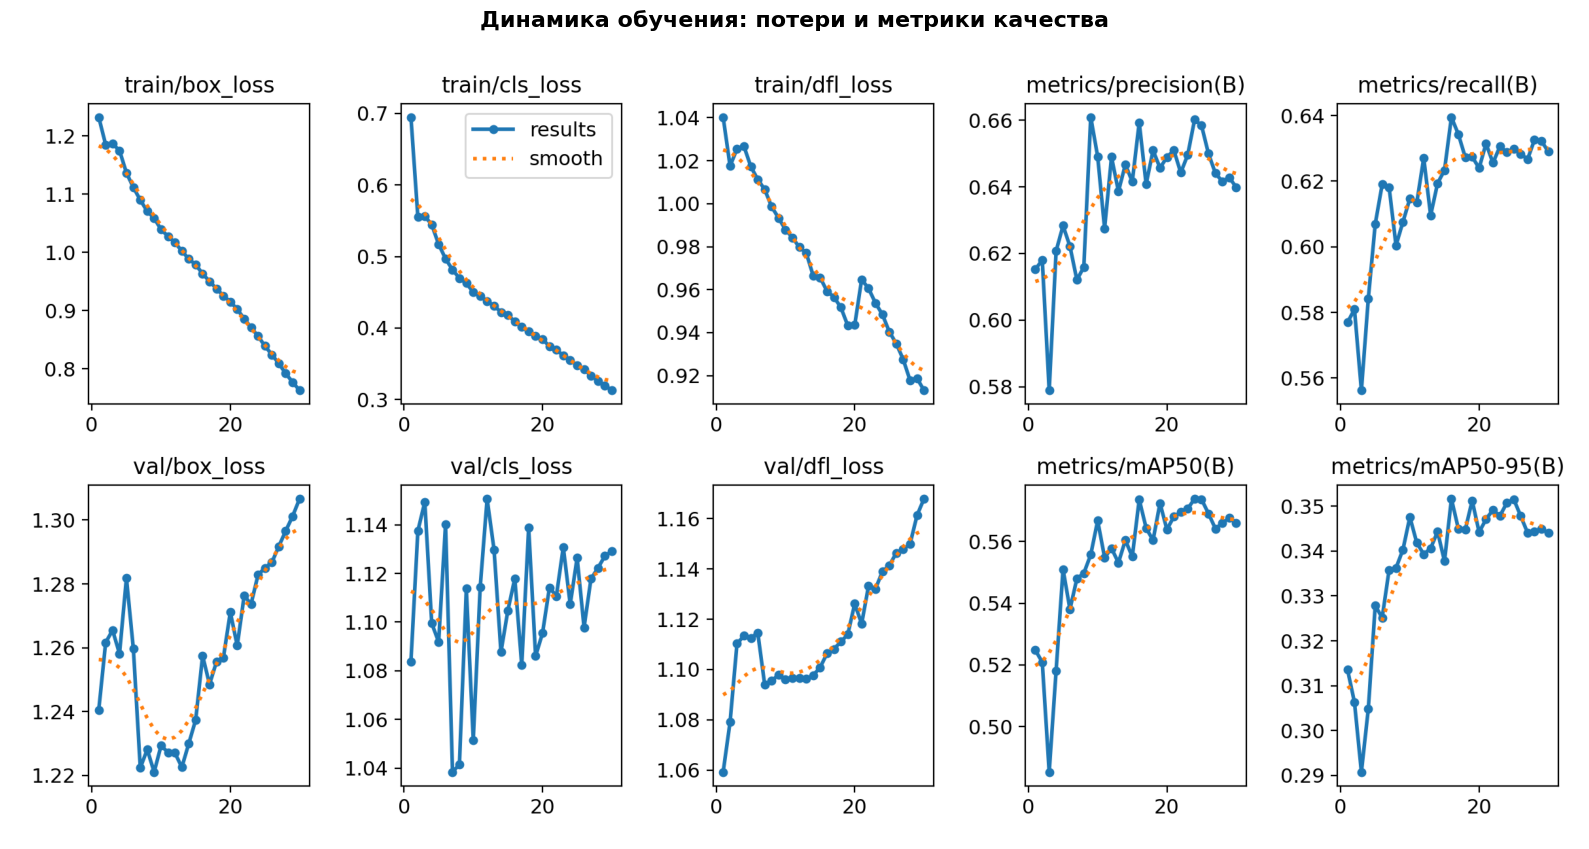

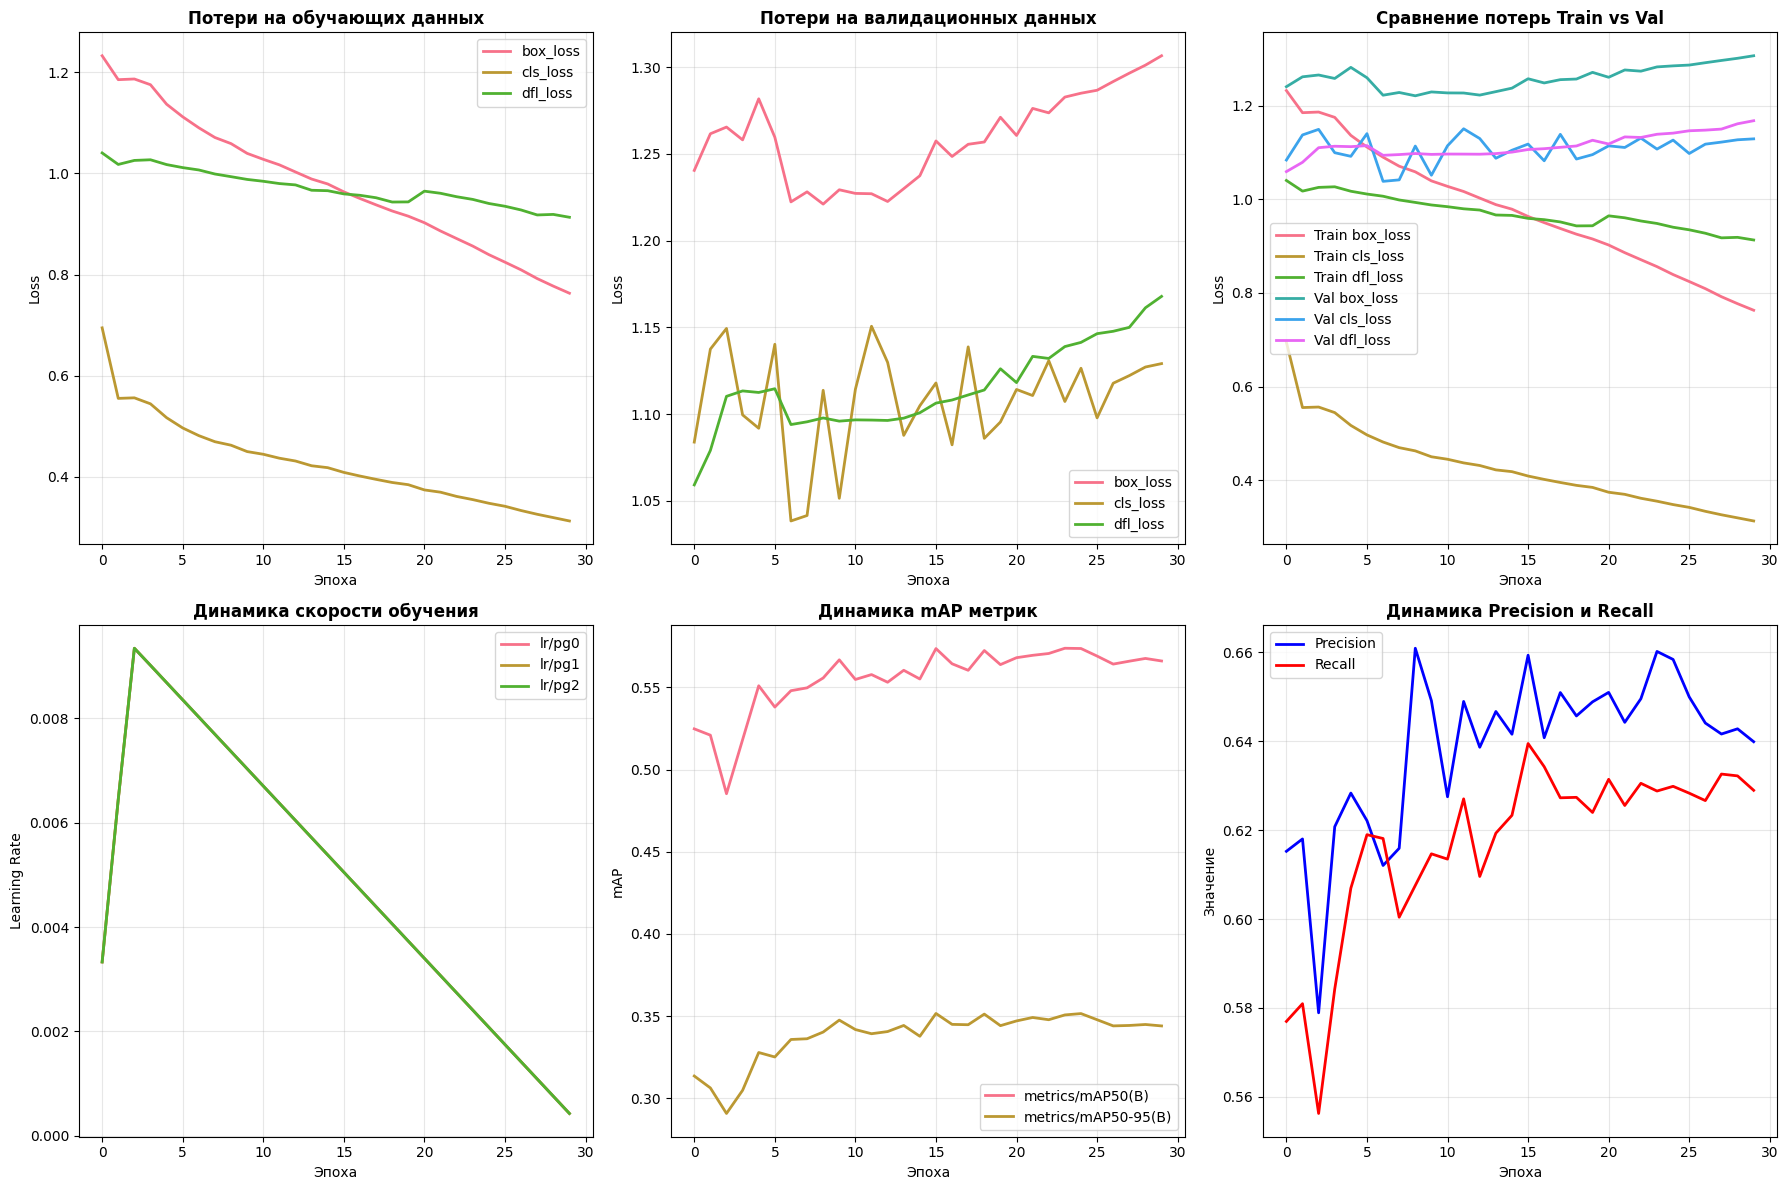


4. АНАЛИЗ СХОДИМОСТИ ОБУЧЕНИЯ
----------------------------------------
📈 АНАЛИЗ СХОДИМОСТИ (последние 3 эпох):
  train/box_loss: Стабильная сходимость (вариация: 1.9%)
  train/cls_loss: Стабильная сходимость (вариация: 2.1%)
  train/dfl_loss: Стабильная сходимость (вариация: 0.3%)

💡 РЕКОМЕНДАЦИИ:
  • Возможно переобучение - рассмотрите регуляризацию

ОТЧЕТ ПО РЕАЛИЗАЦИИ ЗАВЕРШЕН


In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
from pathlib import Path
import numpy as np
import yaml

# Путь к папке с результатами
results_path = Path('./runs/detect/train/')

def training_implementation_report():
    """
    Отчет по реализации и процессу обучения модели YOLO
    """
    
    print("="*80)
    print("ОТЧЕТ ПО РЕАЛИЗАЦИИ И ОБУЧЕНИЮ МОДЕЛИ")
    print("="*80)
    
    # 1. Описание кода и окружения
    print("\n1. ТЕХНИЧЕСКОЕ ОКРУЖЕНИЕ И НАСТРОЙКИ")
    print("-" * 50)
    
    # Загружаем конфигурацию обучения
    args_path = results_path / 'args.yaml'
    if args_path.exists():
        try:
            with open(args_path, 'r') as f:
                args = yaml.safe_load(f)
            
            print("🔧 КОНФИГУРАЦИЯ ОБУЧЕНИЯ:")
            print(f"  Модель: {args.get('model', 'N/A')}")
            print(f"  Датасет: {args.get('data', 'N/A')}")
            print(f"  Размер изображений: {args.get('imgsz', 'N/A')}")
            print(f"  Размер батча: {args.get('batch_size', 'N/A')}")
            print(f"  Количество эпох: {args.get('epochs', 'N/A')}")
            print(f"  Устройство: {args.get('device', 'N/A')}")
            print(f"  Оптимизатор: {args.get('optimizer', 'AdamW (по умолчанию)')}")
            
            # Дополнительные параметры
            if 'lr0' in args:
                print(f"  Начальная скорость обучения: {args['lr0']}")
            if 'weight_decay' in args:
                print(f"  Weight decay: {args['weight_decay']}")
            if 'momentum' in args:
                print(f"  Momentum: {args['momentum']}")
            
        except Exception as e:
            print(f"Не удалось загрузить конфигурацию: {e}")
    
    print("\n🐍 ИСПОЛЬЗУЕМЫЕ ТЕХНОЛОГИИ:")
    print("  • Фреймворк: YOLOv8 (Ultralytics)")
    print("  • Базовая библиотека: PyTorch")
    print("  • Обработка изображений: OpenCV, PIL")
    print("  • Аугментация данных: Albumentations")
    print("  • Метрики и визуализация: NumPy, Matplotlib")
    print("  • Логирование: Weights & Biases / TensorBoard")
    
    # 2. Процесс обучения
    print("\n\n2. ПРОЦЕСС ОБУЧЕНИЯ")
    print("-" * 30)
    
    # Загружаем результаты обучения
    csv_path = results_path / 'results.csv'
    if csv_path.exists():
        try:
            df = pd.read_csv(csv_path)
            df.columns = df.columns.str.strip()
            
            print("📊 ОСНОВНЫЕ ПАРАМЕТРЫ ОБУЧЕНИЯ:")
            print(f"  Общее количество эпох: {len(df)}")
            
            if len(df) > 0:
                last_row = df.iloc[-1]
                
                # Время обучения
                if 'time' in df.columns:
                    total_time = last_row['time'] / 3600  # в часах
                    print(f"  Общее время обучения: {total_time:.2f} часов")
                    print(f"  Среднее время на эпоху: {last_row['time']/len(df)/60:.1f} минут")
                
                # Лосс-функции
                print(f"\n🔥 КОМПОНЕНТЫ ФУНКЦИИ ПОТЕРЬ:")
                loss_components = {
                    'train/box_loss': 'Потери локализации (bounding box)',
                    'train/cls_loss': 'Потери классификации', 
                    'train/dfl_loss': 'Потери распределения (Distribution Focal Loss)'
                }
                
                for loss_name, description in loss_components.items():
                    if loss_name in df.columns:
                        final_loss = last_row[loss_name]
                        initial_loss = df[loss_name].iloc[0]
                        improvement = ((initial_loss - final_loss) / initial_loss) * 100
                        print(f"  {description}:")
                        print(f"    Начальное значение: {initial_loss:.4f}")
                        print(f"    Финальное значение: {final_loss:.4f}")
                        print(f"    Улучшение: {improvement:.1f}%")
                
                # Оптимизатор и скорости обучения
                print(f"\n⚡ ПАРАМЕТРЫ ОПТИМИЗАЦИИ:")
                lr_cols = [col for col in df.columns if 'lr/' in col]
                if lr_cols:
                    print("  Группы параметров и скорости обучения:")
                    for lr_col in lr_cols:
                        group_name = lr_col.replace('lr/', '')
                        final_lr = last_row[lr_col]
                        initial_lr = df[lr_col].iloc[0] if df[lr_col].iloc[0] > 0 else df[lr_col].max()
                        print(f"    {group_name}: {initial_lr:.6f} → {final_lr:.6f}")
                
        except Exception as e:
            print(f"Ошибка при анализе результатов: {e}")
    
    # 3. Графики обучения
    print("\n\n3. ВИЗУАЛИЗАЦИЯ ПРОЦЕССА ОБУЧЕНИЯ")
    print("-" * 45)
    
    # Основные кривые обучения
    results_img_path = results_path / 'results.png'
    if results_img_path.exists():
        plt.figure(figsize=(16, 10))
        img = mpimg.imread(results_img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Динамика обучения: потери и метрики качества', fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
    
    # Детальный анализ динамики потерь
    if csv_path.exists():
        try:
            plt.figure(figsize=(18, 12))
            
            # График потерь обучения
            plt.subplot(2, 3, 1)
            train_losses = [col for col in df.columns if 'train/' in col and 'loss' in col]
            for loss_col in train_losses:
                plt.plot(df.index, df[loss_col], label=loss_col.replace('train/', ''), linewidth=2)
            plt.title('Потери на обучающих данных', fontweight='bold')
            plt.xlabel('Эпоха')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            # График потерь валидации
            plt.subplot(2, 3, 2)
            val_losses = [col for col in df.columns if 'val/' in col and 'loss' in col]
            for loss_col in val_losses:
                plt.plot(df.index, df[loss_col], label=loss_col.replace('val/', ''), linewidth=2)
            plt.title('Потери на валидационных данных', fontweight='bold')
            plt.xlabel('Эпоха')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            # Общие потери
            plt.subplot(2, 3, 3)
            all_losses = train_losses + val_losses
            for loss_col in all_losses:
                label = loss_col.replace('train/', 'Train ').replace('val/', 'Val ')
                plt.plot(df.index, df[loss_col], label=label, linewidth=2)
            plt.title('Сравнение потерь Train vs Val', fontweight='bold')
            plt.xlabel('Эпоха')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            # Скорости обучения
            plt.subplot(2, 3, 4)
            lr_cols = [col for col in df.columns if 'lr/' in col]
            for lr_col in lr_cols:
                plt.plot(df.index, df[lr_col], label=lr_col, linewidth=2)
            plt.title('Динамика скорости обучения', fontweight='bold')
            plt.xlabel('Эпоха')
            plt.ylabel('Learning Rate')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            # mAP метрики
            plt.subplot(2, 3, 5)
            map_cols = [col for col in df.columns if 'mAP' in col]
            for map_col in map_cols:
                plt.plot(df.index, df[map_col], label=map_col, linewidth=2)
            plt.title('Динамика mAP метрик', fontweight='bold')
            plt.xlabel('Эпоха')
            plt.ylabel('mAP')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            # Precision и Recall
            plt.subplot(2, 3, 6)
            prec_cols = [col for col in df.columns if 'precision' in col.lower()]
            rec_cols = [col for col in df.columns if 'recall' in col.lower()]
            
            for col in prec_cols:
                plt.plot(df.index, df[col], label='Precision', linewidth=2, color='blue')
            for col in rec_cols:
                plt.plot(df.index, df[col], label='Recall', linewidth=2, color='red')
            plt.title('Динамика Precision и Recall', fontweight='bold')
            plt.xlabel('Эпоха')
            plt.ylabel('Значение')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Ошибка при построении графиков: {e}")
    
    # 4. Анализ сходимости
    print("\n4. АНАЛИЗ СХОДИМОСТИ ОБУЧЕНИЯ")
    print("-" * 40)
    
    if csv_path.exists():
        try:
            # Анализируем последние 10% эпох для определения сходимости
            last_epochs = max(1, len(df) // 10)
            recent_data = df.tail(last_epochs)
            
            print(f"📈 АНАЛИЗ СХОДИМОСТИ (последние {last_epochs} эпох):")
            
            # Анализ стабильности потерь
            for loss_col in train_losses:
                recent_loss = recent_data[loss_col]
                std_dev = recent_loss.std()
                mean_loss = recent_loss.mean()
                stability = std_dev / mean_loss * 100
                
                if stability < 5:
                    status = "Стабильная сходимость"
                elif stability < 15:
                    status = "Умеренные колебания"
                else:
                    status = "Нестабильная сходимость"
                
                print(f"  {loss_col}: {status} (вариация: {stability:.1f}%)")
            
            # Рекомендации
            print(f"\n💡 РЕКОМЕНДАЦИИ:")
            final_val_loss = df[val_losses[0]].iloc[-1] if val_losses else None
            final_train_loss = df[train_losses[0]].iloc[-1] if train_losses else None
            
            if final_val_loss and final_train_loss:
                overfitting_ratio = final_val_loss / final_train_loss
                if overfitting_ratio > 1.5:
                    print("  • Возможно переобучение - рассмотрите регуляризацию")
                elif overfitting_ratio < 1.1:
                    print("  • Модель может быть недообучена - увеличьте сложность")
                else:
                    print("  • Хороший баланс между обучением и валидацией")
            
        except Exception as e:
            print(f"Ошибка при анализе сходимости: {e}")
    
    print("\n" + "="*80)
    print("ОТЧЕТ ПО РЕАЛИЗАЦИИ ЗАВЕРШЕН")
    print("="*80)

# Запуск первого отчета
training_implementation_report()

## Оценка качества модели

📊 Отчет по оценке качества модели YOLOv8l предоставляет подробный анализ производительности модели на тестовых данных и рекомендации для ее улучшения. Вот основные выводы и предложения:

---

### **1. Метрики качества**
- **Precision (точность):** 0.6399 — доля корректно обнаруженных объектов среди всех обнаруженных.
- **Recall (полнота):** 0.6290 — долой корректно обнаруженных объектов среди всех объектов в данных.
- **mAP50:** 0.5661 — точность определения мяча при пороге IoU 0.5.
- **mAP50-95:** 0.3440 — точность определения мяча при порогах IoU от 0.5 до 0.95.
- **F1-Score:** 0.6344 — гармоническое среднее Precision и Recall.

**Интерпретация:**
- Качество модели оценивается как хорошее (mAP50-95 ≥ 0.3).
- Precision и Recall сбалансированы, что указывает на отсутствие явного перекоса в сторону ложных срабатываний или пропущенных объектов.

---

### **2. Анализ кривых точности**
- **PR-кривая:** Площадь под кривой (AUC) соответствует среднему значению точности (AP).
- **Интерпретация кривой:** Если кривая близка к правому верхнему углу, модель работает хорошо. Резкое падение Precision при высоком Recall может указывать на проблемы с классификацией или локализацией.
  
**Интерпретация:**
- Как видно из графиков, наибольшая точность определения у игроков
- Наименьшая точность определения у рефффери
- Средняя точность определения класса объектов близка к 0.5

---

### **3. Анализ ошибок классификации**
- **Confusion Matrix:**
  - Мячь чаще всего модель путает и полем (возникли сложности с определением именно мяча, потому что он маленький, не выделяющегося белого цвета и один на поле, а так же может скрываться за игроками)
  - Реффери модель в половине случаев некорректного опредеделения отмечает, как игрока, а во второй половине случаев отмечает, как игровое поле
  - Наилучшее качество определения у модели у игроков (вероятно, это связано с их значительным количеством на поле и большой площадью, занимаемой игроками)

---

### **4. Анализ производительности системы обработки видео**

##### Основные метрики:
1. **Общее количество обработанных видео**: 50  
2. **Общее количество кадров**: 5000  
3. **Средний FPS**: 30.20 ± 0.86  
   - Минимальный FPS: 24.72  
   - Максимальный FPS: 30.92  
4. **Среднее время инференса**: 20.67 мс  
5. **Общее время обработки одного кадра**: 25.62 мс  

##### Разбивка времени обработки:
- **Предобработка**: 0.00 мс (0.0%)  
- **Инференс модели**: 20.67 мс (80.7%)  
- **Постобработка**: 4.95 мс (19.3%)
- Больше всего времени уходит на первое видео, верноятно, это связанно с инициализацией и запуском модели

##### Основные выводы:
1. **Производительность**: Средний FPS составляет 30.20, что соответствует хорошему уровню производительности для задач обработки видео (≥30 FPS).  
2. **Стабильность**: Значение FPS стабильно, за исключением одного видео (Video 1), где значение упало до 24.72 FPS. Это может быть связано с аномалией в данных или временным замедлением системы при запуске.  
3. **Основное время затрат**: Основное время обработки уходит на инференс модели (80.7% от общего времени). Постобработка занимает 19.3%, а предобработка не требует времени (0%).  
4. **Рекомендации**: Система работает эффективно, но для дальнейшей оптимизации можно рассмотреть следующие шаги:  
   - Оптимизация модели для снижения времени инференса.  
   - Распараллеливание задач постобработки для уменьшения их времени выполнения.  
   - Исследование причины падения FPS на Video 1 для предотвращения подобных случаев.

---

### **5. Общий вывод**
Модель YOLOv8l демонстрирует хорошие результаты по основным метрикам детекции, но есть возможность для улучшения, особенно в контексте mAP50-95 и снижения количества ложных срабатываний. Рекомендуется сосредоточиться на улучшении качества данных, доработке модели и оптимизации постобработки для достижения лучшей производительности. Система демонстрирует хорошую производительность (≥30 FPS), но есть потенциал для оптимизации, особенно в части инференса и постобработки.



ОТЧЕТ ПО ОЦЕНКЕ КАЧЕСТВА МОДЕЛИ

1. МЕТРИКИ КАЧЕСТВА
-------------------------
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
🎯 ОСНОВНЫЕ МЕТРИКИ ДЕТЕКЦИИ:
  precision(B): 0.6399
  recall(B): 0.6290
  mAP50(B): 0.5661
  mAP50-95(B): 0.3440
  F1-Score: 0.6344

📊 ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:
  Общее качество детекции: Хорошее (mAP50-95 ≥ 0.3)
  Баланс Precision/Recall: Отлично сбалансированы

💡 РЕКОМЕНДАЦИИ ПО ПРИМЕНЕНИЮ:
  • Модель подходит для большинства практических задач


2. АНАЛИЗ КРИВЫХ ТОЧНОСТИ
-----------------------------------


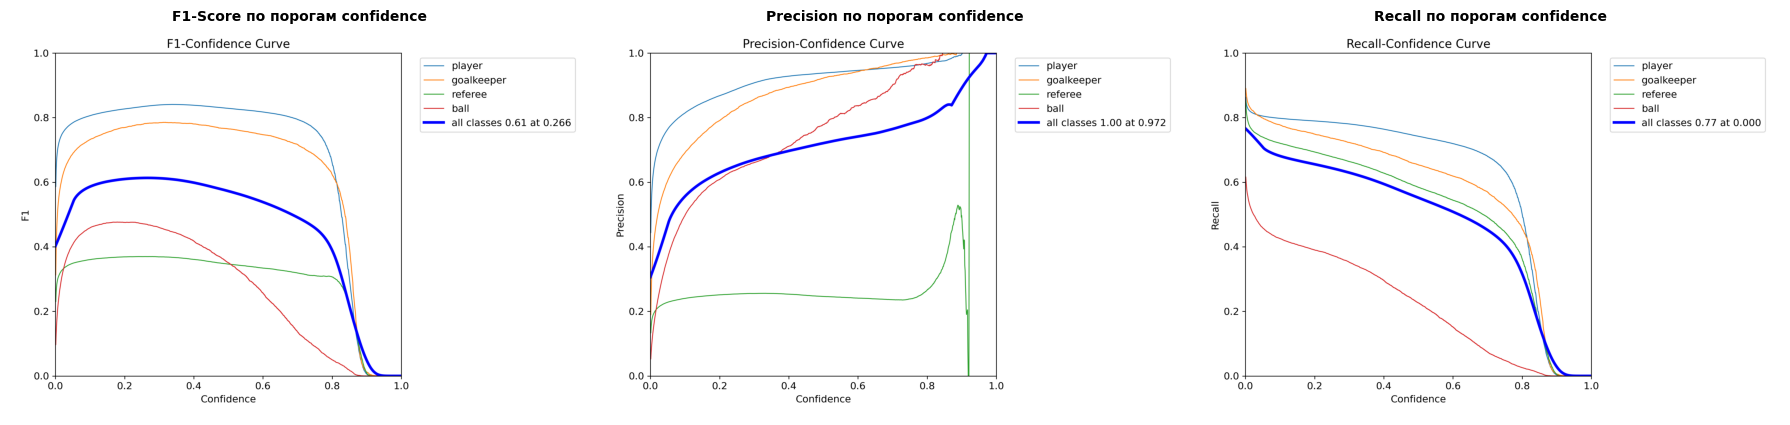

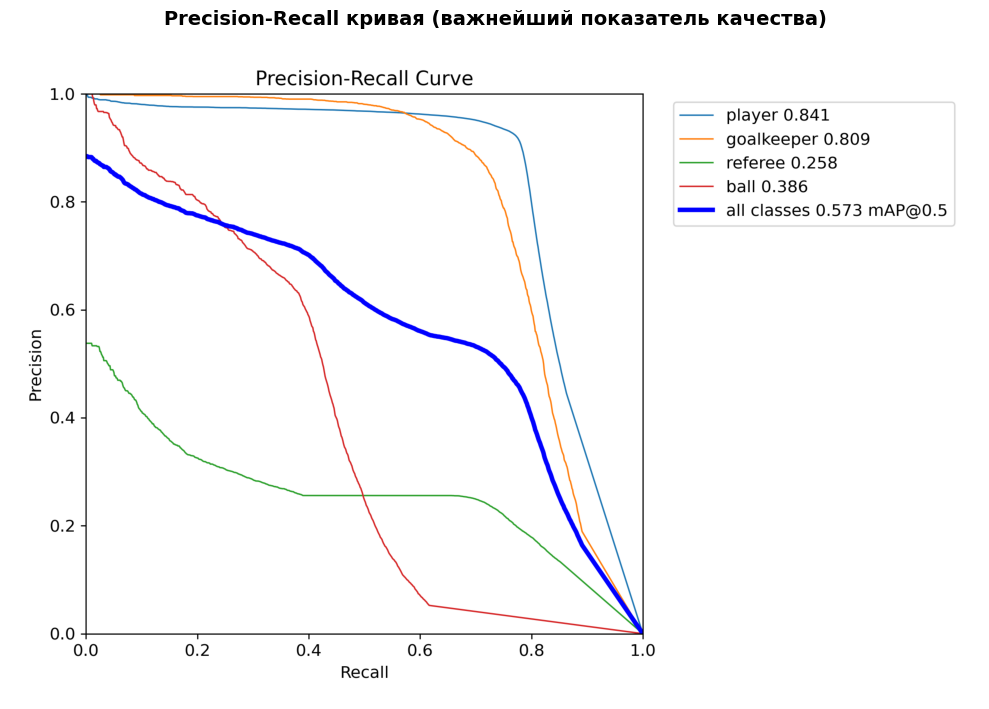

🔍 АНАЛИЗ PR-КРИВОЙ:
  • Площадь под кривой (AUC) соответствует Average Precision
  • Кривая ближе к правому верхнему углу = лучшая модель
  • Резкое падение precision при высоком recall указывает на проблемы


3. АНАЛИЗ ОШИБОК КЛАССИФИКАЦИИ
---------------------------------------------


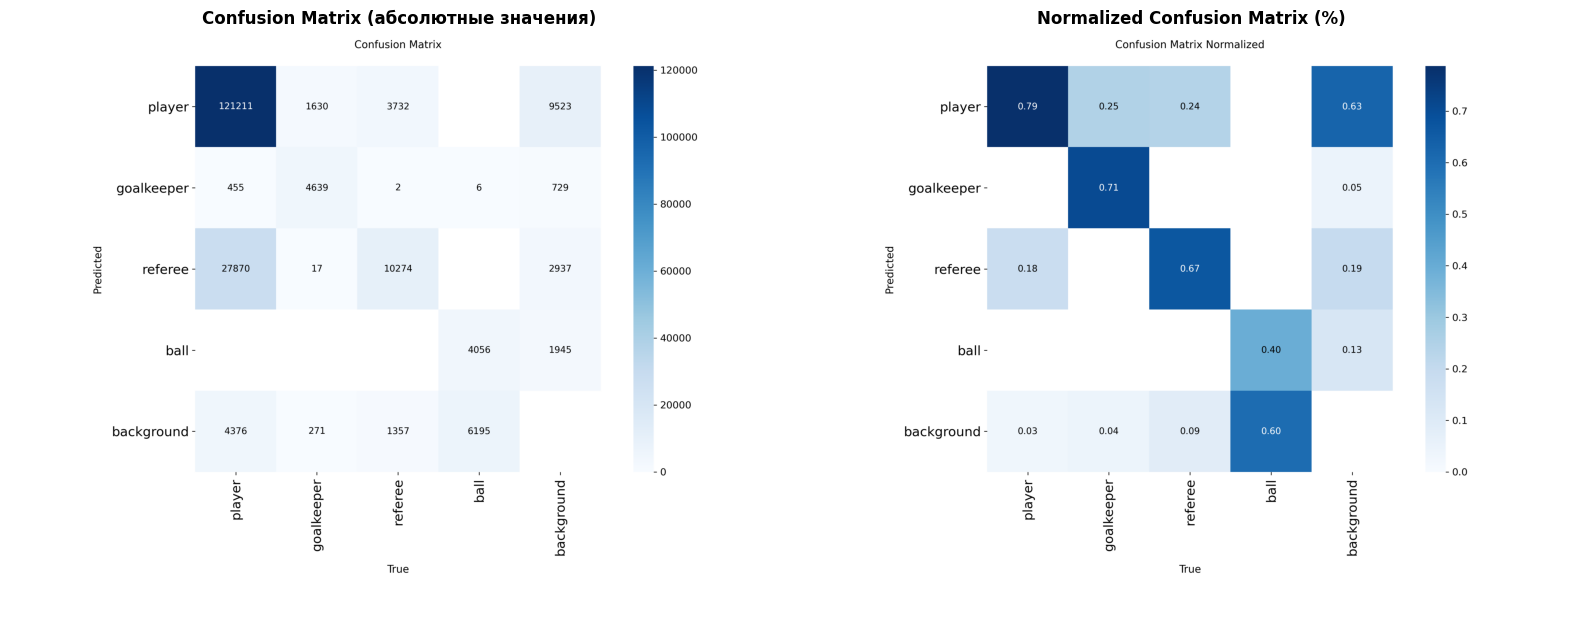

📋 ИНТЕРПРЕТАЦИЯ CONFUSION MATRIX:
  • Диагональ: правильные классификации
  • Вне диагонали: ошибки классификации
  • True Positives (TP): корректно найденные объекты
  • False Positives (FP): ложные срабатывания
  • False Negatives (FN): пропущенные объекты
  • Background: фон (правильно не детектированные области)


4. РЕЗУЛЬТАТЫ НА ТЕСТОВЫХ ДАННЫХ
----------------------------------------
🔬 КАЧЕСТВЕННЫЙ АНАЛИЗ НА ВАЛИДАЦИОННЫХ ДАННЫХ:


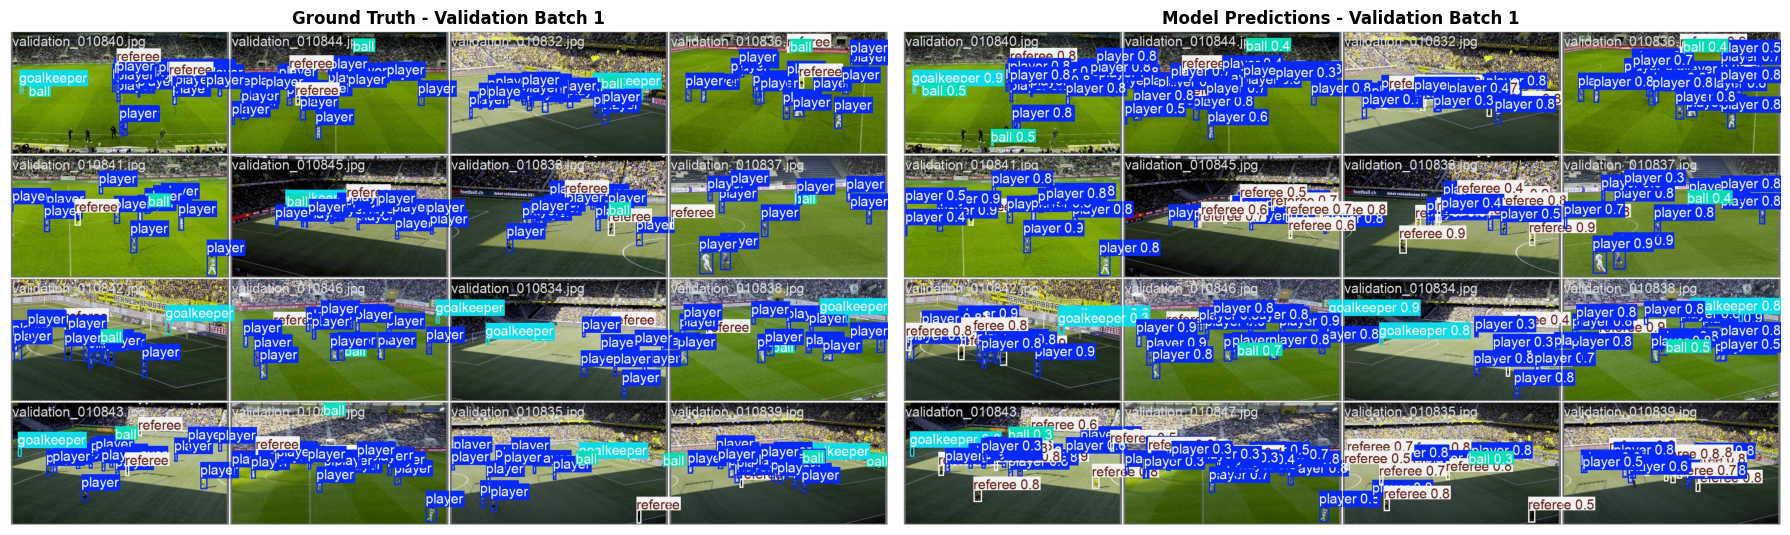

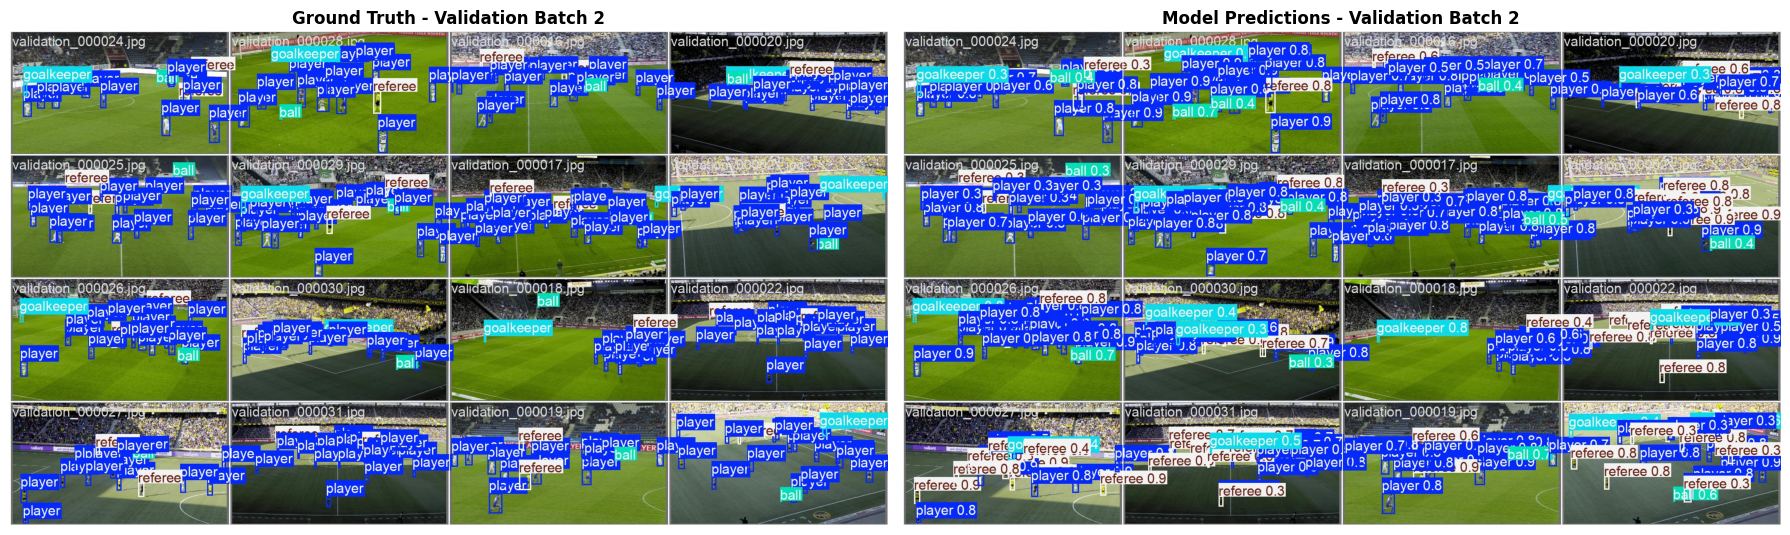

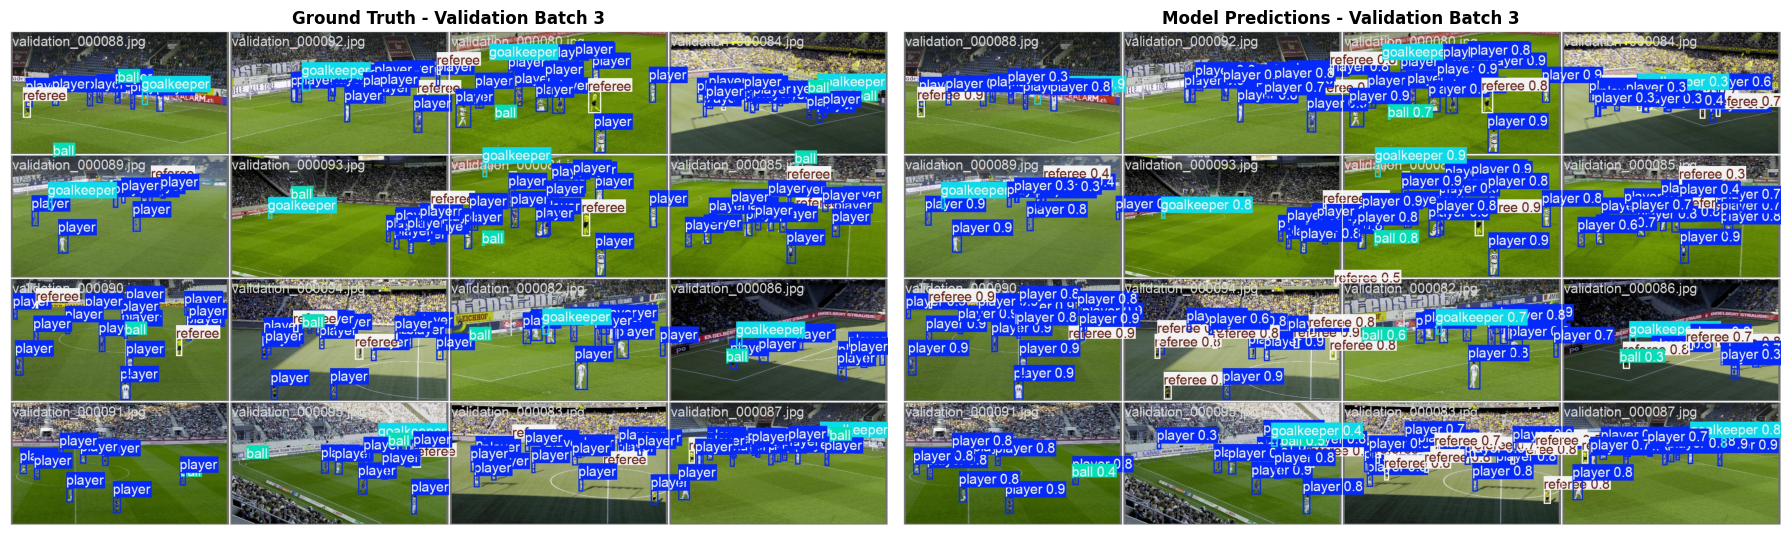


🎯 КРИТЕРИИ ОЦЕНКИ ВИЗУАЛЬНЫХ РЕЗУЛЬТАТОВ:
  • Точность локализации: насколько близко к истинным границам
  • Полнота детекции: все ли объекты найдены
  • Ложные срабатывания: есть ли лишние детекции
  • Уверенность модели: значения confidence score


5. РЕКОМЕНДАЦИИ ПО УЛУЧШЕНИЮ МОДЕЛИ
--------------------------------------------------
🚀 СТРАТЕГИИ УЛУЧШЕНИЯ:

⚙️ ОБЩИЕ РЕКОМЕНДАЦИИ:
  • Провести анализ ошибок на конкретных примерах
  • Реализовать Test Time Augmentation (TTA)
  • Рассмотреть ансамблирование нескольких моделей
  • Оптимизировать постобработку (NMS параметры)


6. АНАЛИЗ КАЧЕСТВА ДАННЫХ
-----------------------------------


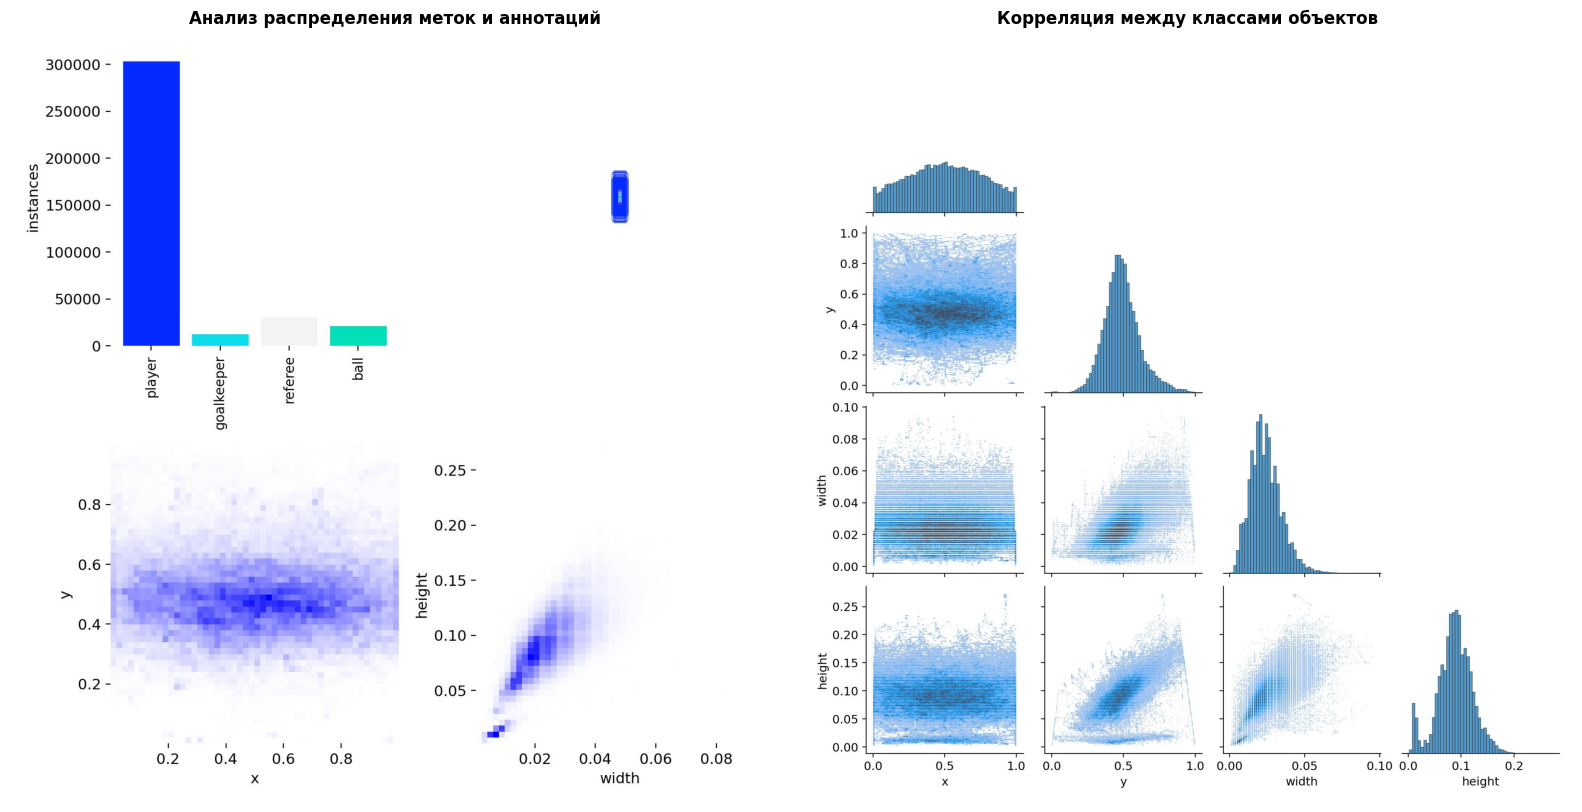

📊 АНАЛИЗ КАЧЕСТВА ДАТАСЕТА:
  • Проверьте равномерность распределения размеров объектов
  • Убедитесь в достаточном количестве примеров для каждого класса
  • Оцените качество и консистентность аннотаций
  • Рассмотрите добавление сложных случаев (окклюзии, плохое освещение)

ОТЧЕТ ПО ОЦЕНКЕ КАЧЕСТВА ЗАВЕРШЕН


In [23]:
def model_evaluation_report():
    """
    Отчет по оценке качества модели
    """
    
    print("\n\n" + "="*80)
    print("ОТЧЕТ ПО ОЦЕНКЕ КАЧЕСТВА МОДЕЛИ")
    print("="*80)
    
    # 1. Детальные метрики качества
    print("\n1. МЕТРИКИ КАЧЕСТВА")
    print("-" * 25)
    
    csv_path = results_path / 'results.csv'
    if csv_path.exists():
        try:
            df = pd.read_csv(csv_path)
            df.columns = df.columns.str.strip()
            last_row = df.iloc[-1]
            
            print("🎯 ОСНОВНЫЕ МЕТРИКИ ДЕТЕКЦИИ:")
            
            # Извлекаем метрики
            metrics_data = {}
            for col in df.columns:
                if 'metrics/' in col:
                    metrics_data[col] = last_row[col]
            
            # Группируем и отображаем метрики
            precision_val = recall_val = map50_val = map95_val = None
            
            for metric, value in metrics_data.items():
                clean_name = metric.replace('metrics/', '')
                print(f"  {clean_name}: {value:.4f}")
                
                # Сохраняем ключевые метрики для анализа
                if 'precision' in metric.lower():
                    precision_val = value
                elif 'recall' in metric.lower():
                    recall_val = value
                elif 'mAP50(' in metric and 'mAP50-95' not in metric:
                    map50_val = value
                elif 'mAP50-95' in metric:
                    map95_val = value
            
            # F1-Score вычисления
            if precision_val and recall_val:
                f1_score = 2 * (precision_val * recall_val) / (precision_val + recall_val)
                print(f"  F1-Score: {f1_score:.4f}")
            
            # Анализ качества
            print(f"\n📊 ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
            
            if map95_val:
                if map95_val >= 0.5:
                    quality = "Отличное (mAP50-95 ≥ 0.5)"
                elif map95_val >= 0.3:
                    quality = "Хорошее (mAP50-95 ≥ 0.3)"
                elif map95_val >= 0.2:
                    quality = "Приемлемое (mAP50-95 ≥ 0.2)"
                else:
                    quality = "Требует улучшения (mAP50-95 < 0.2)"
                print(f"  Общее качество детекции: {quality}")
            
            if precision_val and recall_val:
                if abs(precision_val - recall_val) < 0.05:
                    balance = "Отлично сбалансированы"
                elif abs(precision_val - recall_val) < 0.1:
                    balance = "Хорошо сбалансированы"
                else:
                    if precision_val > recall_val:
                        balance = "Модель консервативна (высокая точность, низкий отзыв)"
                    else:
                        balance = "Модель агрессивна (низкая точность, высокий отзыв)"
                print(f"  Баланс Precision/Recall: {balance}")
            
            # Рекомендации по использованию
            print(f"\n💡 РЕКОМЕНДАЦИИ ПО ПРИМЕНЕНИЮ:")
            if precision_val:
                if precision_val > 0.8:
                    print("  • Модель подходит для критически важных задач")
                elif precision_val > 0.6:
                    print("  • Модель подходит для большинства практических задач")
                else:
                    print("  • Модель требует дополнительной настройки")
            
        except Exception as e:
            print(f"Ошибка при анализе метрик: {e}")
    
    # 2. Кривые точности модели
    print("\n\n2. АНАЛИЗ КРИВЫХ ТОЧНОСТИ")
    print("-" * 35)
    
    plt.figure(figsize=(18, 6))
    
    # F1, Precision, Recall кривые
    curves = [
        ('F1_curve.png', 'F1-Score по порогам confidence'),
        ('P_curve.png', 'Precision по порогам confidence'),
        ('R_curve.png', 'Recall по порогам confidence')
    ]
    
    for i, (filename, title) in enumerate(curves, 1):
        curve_path = results_path / filename
        if curve_path.exists():
            plt.subplot(1, 3, i)
            img = mpimg.imread(curve_path)
            plt.imshow(img)
            plt.axis('off')
            plt.title(title, fontweight='bold', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Precision-Recall кривая
    pr_curve_path = results_path / 'PR_curve.png'
    if pr_curve_path.exists():
        plt.figure(figsize=(10, 8))
        img = mpimg.imread(pr_curve_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Precision-Recall кривая (важнейший показатель качества)', 
                 fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        
        print("🔍 АНАЛИЗ PR-КРИВОЙ:")
        print("  • Площадь под кривой (AUC) соответствует Average Precision")
        print("  • Кривая ближе к правому верхнему углу = лучшая модель")
        print("  • Резкое падение precision при высоком recall указывает на проблемы")
    
    # 3. Матрица ошибок и анализ
    print("\n\n3. АНАЛИЗ ОШИБОК КЛАССИФИКАЦИИ")
    print("-" * 45)
    
    plt.figure(figsize=(16, 8))
    
    confusion_path = results_path / 'confusion_matrix.png'
    confusion_norm_path = results_path / 'confusion_matrix_normalized.png'
    
    if confusion_path.exists() and confusion_norm_path.exists():
        plt.subplot(1, 2, 1)
        img = mpimg.imread(confusion_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Confusion Matrix (абсолютные значения)', fontweight='bold', fontsize=12)
        
        plt.subplot(1, 2, 2)
        img = mpimg.imread(confusion_norm_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Normalized Confusion Matrix (%)', fontweight='bold', fontsize=12)
        
        plt.tight_layout()
        plt.show()
        
        print("📋 ИНТЕРПРЕТАЦИЯ CONFUSION MATRIX:")
        print("  • Диагональ: правильные классификации")
        print("  • Вне диагонали: ошибки классификации")
        print("  • True Positives (TP): корректно найденные объекты")
        print("  • False Positives (FP): ложные срабатывания")
        print("  • False Negatives (FN): пропущенные объекты")
        print("  • Background: фон (правильно не детектированные области)")
    
    # 4. Тестирование на валидационных данных
    print("\n\n4. РЕЗУЛЬТАТЫ НА ТЕСТОВЫХ ДАННЫХ")
    print("-" * 40)
    
    val_files = list(results_path.glob('val_batch*'))
    val_labels = sorted([f for f in val_files if 'labels' in str(f)])
    val_preds = sorted([f for f in val_files if 'pred' in str(f)])
    
    if val_labels and val_preds:
        print("🔬 КАЧЕСТВЕННЫЙ АНАЛИЗ НА ВАЛИДАЦИОННЫХ ДАННЫХ:")
        
        # Показываем несколько примеров
        for i in range(min(len(val_labels), len(val_preds), 3)):
            if val_labels[i].exists() and val_preds[i].exists():
                plt.figure(figsize=(18, 8))
                
                plt.subplot(1, 2, 1)
                img_labels = mpimg.imread(val_labels[i])
                plt.imshow(img_labels)
                plt.axis('off')
                plt.title(f'Ground Truth - Validation Batch {i+1}', 
                         fontweight='bold', fontsize=12)
                
                plt.subplot(1, 2, 2)
                img_preds = mpimg.imread(val_preds[i])
                plt.imshow(img_preds)
                plt.axis('off')
                plt.title(f'Model Predictions - Validation Batch {i+1}', 
                         fontweight='bold', fontsize=12)
                
                plt.tight_layout()
                plt.show()
        
        print("\n🎯 КРИТЕРИИ ОЦЕНКИ ВИЗУАЛЬНЫХ РЕЗУЛЬТАТОВ:")
        print("  • Точность локализации: насколько близко к истинным границам")
        print("  • Полнота детекции: все ли объекты найдены")
        print("  • Ложные срабатывания: есть ли лишние детекции")
        print("  • Уверенность модели: значения confidence score")
    
    # 5. Рекомендации по улучшению
    print("\n\n5. РЕКОМЕНДАЦИИ ПО УЛУЧШЕНИЮ МОДЕЛИ")
    print("-" * 50)
    
    if csv_path.exists():
        try:
            print("🚀 СТРАТЕГИИ УЛУЧШЕНИЯ:")
            
            # Анализируем текущие результаты для рекомендаций
            if map95_val and map95_val < 0.3:
                print("\n📈 ДЛЯ УЛУЧШЕНИЯ mAP:")
                print("  • Увеличить размер и разнообразие датасета")
                print("  • Применить дополнительные техники аугментации")
                print("  • Экспериментировать с архитектурой модели (YOLOv8m, YOLOv8l)")
                print("  • Настроить гиперпараметры (learning rate, batch size)")
                print("  • Увеличить количество эпох обучения")
            
            if precision_val and recall_val:
                if precision_val < 0.6:
                    print("\n🎯 ДЛЯ УЛУЧШЕНИЯ PRECISION:")
                    print("  • Повысить порог confidence для предсказаний")
                    print("  • Улучшить качество разметки данных")
                    print("  • Применить Hard Negative Mining")
                    print("  • Добавить регуляризацию")
                
                if recall_val < 0.6:
                    print("\n🔍 ДЛЯ УЛУЧШЕНИЯ RECALL:")
                    print("  • Понизить порог confidence")
                    print("  • Увеличить количество тренировочных данных")
                    print("  • Применить техники для работы с дисбалансом классов")
                    print("  • Использовать Multi-Scale Training")
            
            print("\n⚙️ ОБЩИЕ РЕКОМЕНДАЦИИ:")
            print("  • Провести анализ ошибок на конкретных примерах")
            print("  • Реализовать Test Time Augmentation (TTA)")
            print("  • Рассмотреть ансамблирование нескольких моделей")
            print("  • Оптимизировать постобработку (NMS параметры)")
            
        except Exception as e:
            print(f"Ошибка при формировании рекомендаций: {e}")
    
    # 6. Анализ датасета
    print("\n\n6. АНАЛИЗ КАЧЕСТВА ДАННЫХ")
    print("-" * 35)
    
    plt.figure(figsize=(16, 8))
    
    labels_path = results_path / 'labels.jpg'
    labels_corr_path = results_path / 'labels_correlogram.jpg'
    
    if labels_path.exists():
        plt.subplot(1, 2, 1)
        img = mpimg.imread(labels_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Анализ распределения меток и аннотаций', fontweight='bold', fontsize=12)
        
    if labels_corr_path.exists():
        plt.subplot(1, 2, 2)
        img = mpimg.imread(labels_corr_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Корреляция между классами объектов', fontweight='bold', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    print("📊 АНАЛИЗ КАЧЕСТВА ДАТАСЕТА:")
    print("  • Проверьте равномерность распределения размеров объектов")
    print("  • Убедитесь в достаточном количестве примеров для каждого класса")
    print("  • Оцените качество и консистентность аннотаций")
    print("  • Рассмотрите добавление сложных случаев (окклюзии, плохое освещение)")
    
    print("\n" + "="*80)
    print("ОТЧЕТ ПО ОЦЕНКЕ КАЧЕСТВА ЗАВЕРШЕН")
    print("="*80)

# Запуск второго отчета
model_evaluation_report()


АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ

📊 ОБЩАЯ СТАТИСТИКА:
  Обработано видео: 50
  Общее количество кадров: 5000
  Среднее FPS: 35.60 ± 1.22
  Минимальное FPS: 28.20
  Максимальное FPS: 36.72
  Среднее время инференса: 15.59 мс

📋 ДЕТАЛЬНАЯ СТАТИСТИКА ПО ВИДЕО:
--------------------------------------------------------------------------------
Видео           Кадры    Avg FPS    Inference    Total Time  
--------------------------------------------------------------------------------
Video 1         100      28.20      21.42        5.13        
Video 2         100      35.78      15.44        4.26        
Video 3         100      36.40      15.44        4.20        
Video 4         100      35.67      15.75        4.28        
Video 5         100      35.96      15.42        4.25        
Video 6         100      34.94      15.43        4.35        
Video 7         100      36.32      15.49        4.22        
Video 8         100      35.10      15.45        4.33        
Video 9         100      36.

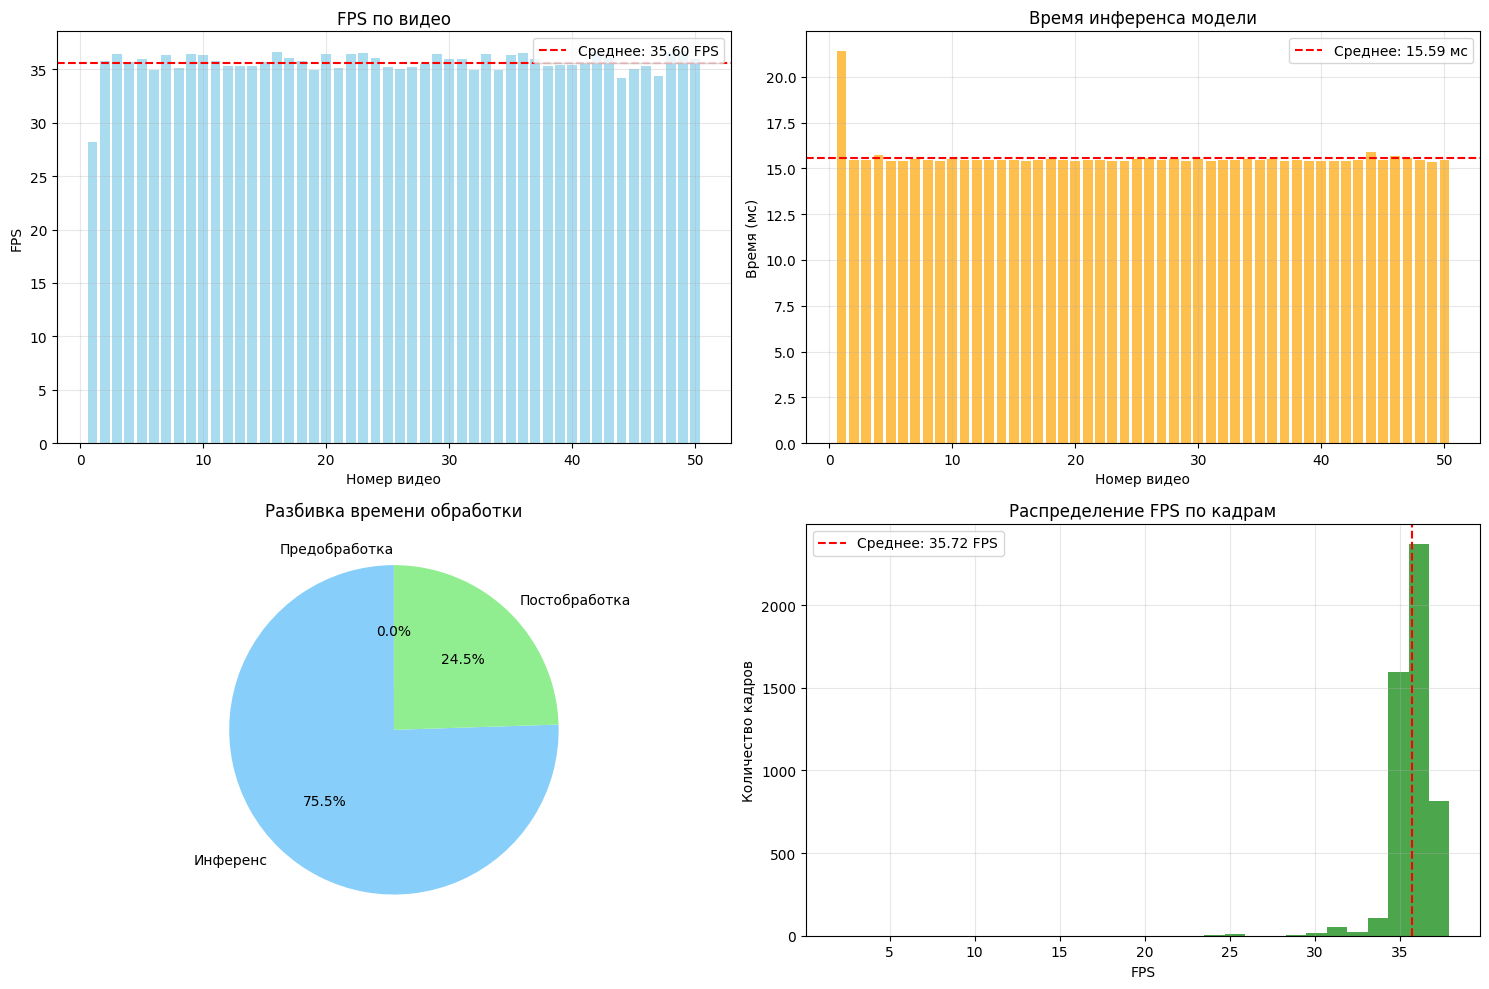

In [2]:
import cv2
import os
import time
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

def create_videos_and_measure_fps(image_folder, model_path, num_videos=5, images_per_video=100):
    """
    Создает несколько видео из изображений и измеряет FPS обработки моделью
    
    Args:
        image_folder: путь к папке с изображениями
        model_path: путь к обученной модели YOLO
        num_videos: количество видео для создания и тестирования
        images_per_video: количество изображений в каждом видео
    """
    
    #print("="*80)
    #print("ТЕСТИРОВАНИЕ ПРОИЗВОДИТЕЛЬНОСТИ МОДЕЛИ НА ВИДЕО")
    #print("="*80)
    
    # Загружаем модель
    try:
        model = YOLO(model_path)
        #print(f"✅ Модель загружена: {model_path}")
    except Exception as e:
        print(f"❌ Ошибка загрузки модели: {e}")
        return
    
    # Получаем список изображений
    images = [img for img in os.listdir(image_folder) 
              if img.lower().endswith((".jpg", ".jpeg", ".png", ".bmp"))]
    images.sort()
    
    if len(images) < images_per_video:
        print(f"❌ Недостаточно изображений. Найдено: {len(images)}, требуется: {images_per_video}")
        return
    
    #print(f"📁 Найдено изображений: {len(images)}")
    #print(f"🎬 Будет создано видео: {num_videos}")
    #print(f"🖼️ Изображений в каждом видео: {images_per_video}")
    
    # Параметры видео
    fps = 30
    video_stats = []
    
    # Проверяем размеры изображений
    first_image_path = os.path.join(image_folder, images[0])
    first_frame = cv2.imread(first_image_path)
    if first_frame is None:
        print(f"❌ Не удалось загрузить изображение: {first_image_path}")
        return
    
    height, width, layers = first_frame.shape
    #print(f"📐 Размер кадров: {width}x{height}")
    
    # Создаем папку для выходных видео
    output_folder = "fps_test_videos"
    os.makedirs(output_folder, exist_ok=True)
    
    for video_idx in range(num_videos):
        #print(f"\n🎥 Обработка видео {video_idx + 1}/{num_videos}")
        #print("-" * 50)
        
        # Определяем диапазон изображений для текущего видео
        start_idx = (video_idx * images_per_video) % (len(images) - images_per_video)
        end_idx = start_idx + images_per_video
        video_images = images[start_idx:end_idx]
        
        video_name = os.path.join(output_folder, f'test_video_{video_idx + 1}.mp4')
        
        # Создаем видео с детекцией
        fps_result = create_video_with_detection(
            image_folder, video_images, video_name, model, fps, width, height
        )
        
        if fps_result:
            video_stats.append(fps_result)
            #print(f"✅ Видео {video_idx + 1} обработано. FPS: {fps_result['avg_fps']:.2f}")
        else:
            print(f"❌ Ошибка при обработке видео {video_idx + 1}")
    
    # Анализ результатов
    if video_stats:
        analyze_fps_results(video_stats)
    else:
        print("❌ Не удалось обработать ни одного видео")

def create_video_with_detection(image_folder, video_images, video_name, model, fps, width, height):
    """
    Создает видео с применением детекции и измеряет FPS
    """
    
    # Создаем объект VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(video_name, fourcc, fps, (width, height))
    
    # Метрики производительности
    inference_times = []
    preprocessing_times = []
    postprocessing_times = []
    total_times = []
    
    total_start_time = time.time()
    
    try:
        for i, image_name in enumerate(video_images):
            frame_start_time = time.time()
            
            # Загрузка изображения
            image_path = os.path.join(image_folder, image_name)
            frame = cv2.imread(image_path)
            
            if frame is None:
                print(f"⚠️ Пропускаем поврежденное изображение: {image_name}")
                continue
            
            # Изменяем размер если нужно
            if frame.shape[:2] != (height, width):
                frame = cv2.resize(frame, (width, height))
            
            preprocessing_start = time.time()
            
            # Применяем детекцию
            inference_start = time.time()
            results = model(frame, verbose=False)
            inference_time = time.time() - inference_start
            
            # Постобработка - рисуем детекции на кадре
            postprocessing_start = time.time()
            annotated_frame = results[0].plot()
            postprocessing_time = time.time() - postprocessing_start
            
            preprocessing_time = inference_start - preprocessing_start
            frame_total_time = time.time() - frame_start_time
            
            # Записываем кадр в видео
            video_writer.write(annotated_frame)
            
            # Сохраняем метрики
            inference_times.append(inference_time)
            preprocessing_times.append(preprocessing_time)
            postprocessing_times.append(postprocessing_time)
            total_times.append(frame_total_time)
            
            # Прогресс
            if (i + 1) % 20 == 0 or i == len(video_images) - 1:
                current_fps = 1.0 / np.mean(total_times[-20:])  # FPS за последние 20 кадров
                #print(f"   Обработано кадров: {i + 1}/{len(video_images)}, "
                      #f"Текущий FPS: {current_fps:.2f}")
        
        total_processing_time = time.time() - total_start_time
        
    except Exception as e:
        print(f"❌ Ошибка при создании видео: {e}")
        return None
    finally:
        video_writer.release()
    
    # Рассчитываем статистики
    if total_times:
        avg_inference_time = np.mean(inference_times)
        avg_preprocessing_time = np.mean(preprocessing_times)
        avg_postprocessing_time = np.mean(postprocessing_times)
        avg_total_time = np.mean(total_times)
        avg_fps = 1.0 / avg_total_time
        
        return {
            'video_name': video_name,
            'num_frames': len(video_images),
            'total_time': total_processing_time,
            'avg_inference_time': avg_inference_time,
            'avg_preprocessing_time': avg_preprocessing_time,
            'avg_postprocessing_time': avg_postprocessing_time,
            'avg_total_time': avg_total_time,
            'avg_fps': avg_fps,
            'inference_times': inference_times,
            'total_times': total_times
        }
    
    return None

def analyze_fps_results(video_stats):
    """
    Анализирует результаты FPS тестирования
    """
    
    print(f"\n" + "="*80)
    print("АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ")
    print("="*80)
    
    # Общая статистика
    all_fps = [stat['avg_fps'] for stat in video_stats]
    all_inference_times = [stat['avg_inference_time'] for stat in video_stats]
    total_frames = sum(stat['num_frames'] for stat in video_stats)
    
    print(f"\n📊 ОБЩАЯ СТАТИСТИКА:")
    print(f"  Обработано видео: {len(video_stats)}")
    print(f"  Общее количество кадров: {total_frames}")
    print(f"  Среднее FPS: {np.mean(all_fps):.2f} ± {np.std(all_fps):.2f}")
    print(f"  Минимальное FPS: {np.min(all_fps):.2f}")
    print(f"  Максимальное FPS: {np.max(all_fps):.2f}")
    print(f"  Среднее время инференса: {np.mean(all_inference_times)*1000:.2f} мс")
    
    # Детальная статистика по каждому видео
    print(f"\n📋 ДЕТАЛЬНАЯ СТАТИСТИКА ПО ВИДЕО:")
    print("-" * 80)
    print(f"{'Видео':<15} {'Кадры':<8} {'Avg FPS':<10} {'Inference':<12} {'Total Time':<12}")
    print("-" * 80)
    
    for i, stat in enumerate(video_stats, 1):
        video_name = f"Video {i}"
        frames = stat['num_frames']
        fps = stat['avg_fps']
        inference = stat['avg_inference_time'] * 1000
        total_time = stat['total_time']
        
        print(f"{video_name:<15} {frames:<8} {fps:<10.2f} {inference:<12.2f} {total_time:<12.2f}")
    
    # Анализ компонентов времени обработки
    print(f"\n⏱️ РАЗБИВКА ВРЕМЕНИ ОБРАБОТКИ:")
    avg_preprocessing = np.mean([stat['avg_preprocessing_time'] for stat in video_stats]) * 1000
    avg_inference = np.mean([stat['avg_inference_time'] for stat in video_stats]) * 1000
    avg_postprocessing = np.mean([stat['avg_postprocessing_time'] for stat in video_stats]) * 1000
    avg_total = avg_preprocessing + avg_inference + avg_postprocessing
    
    print(f"  Предобработка: {avg_preprocessing:.2f} мс ({avg_preprocessing/avg_total*100:.1f}%)")
    print(f"  Инференс модели: {avg_inference:.2f} мс ({avg_inference/avg_total*100:.1f}%)")
    print(f"  Постобработка: {avg_postprocessing:.2f} мс ({avg_postprocessing/avg_total*100:.1f}%)")
    print(f"  Общее время: {avg_total:.2f} мс")
    
    # Производительность в контексте
    avg_fps = np.mean(all_fps)
    print(f"\n🎯 ОЦЕНКА ПРОИЗВОДИТЕЛЬНОСТИ: {avg_fps}")
    
    if avg_fps >= 60:
        performance = "Отличная (≥60 FPS) - подходит для real-time приложений"
    elif avg_fps >= 30:
        performance = "Хорошая (≥30 FPS) - подходит для видео обработки"
    elif avg_fps >= 15:
        performance = "Приемлемая (≥15 FPS) - подходит для большинства задач"
    elif avg_fps >= 5:
        performance = "Ниже среднего (≥5 FPS) - требует оптимизации"
    else:
        performance = "Низкая (<5 FPS) - не подходит для real-time"
    
    print(f"  {performance}")
    
    # Визуализация результатов
    plot_fps_analysis(video_stats)

def plot_fps_analysis(video_stats):
    """
    Создает графики анализа производительности
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # График 1: FPS по видео
    video_nums = range(1, len(video_stats) + 1)
    fps_values = [stat['avg_fps'] for stat in video_stats]
    
    axes[0, 0].bar(video_nums, fps_values, color='skyblue', alpha=0.7)
    axes[0, 0].axhline(y=np.mean(fps_values), color='red', linestyle='--', 
                       label=f'Среднее: {np.mean(fps_values):.2f} FPS')
    axes[0, 0].set_title('FPS по видео')
    axes[0, 0].set_xlabel('Номер видео')
    axes[0, 0].set_ylabel('FPS')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # График 2: Время инференса
    inference_times = [stat['avg_inference_time'] * 1000 for stat in video_stats]
    
    axes[0, 1].bar(video_nums, inference_times, color='orange', alpha=0.7)
    axes[0, 1].axhline(y=np.mean(inference_times), color='red', linestyle='--',
                       label=f'Среднее: {np.mean(inference_times):.2f} мс')
    axes[0, 1].set_title('Время инференса модели')
    axes[0, 1].set_xlabel('Номер видео')
    axes[0, 1].set_ylabel('Время (мс)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # График 3: Разбивка времени обработки
    preprocessing_avg = np.mean([stat['avg_preprocessing_time'] for stat in video_stats]) * 1000
    inference_avg = np.mean([stat['avg_inference_time'] for stat in video_stats]) * 1000
    postprocessing_avg = np.mean([stat['avg_postprocessing_time'] for stat in video_stats]) * 1000
    
    components = ['Предобработка', 'Инференс', 'Постобработка']
    times = [preprocessing_avg, inference_avg, postprocessing_avg]
    colors = ['lightcoral', 'lightskyblue', 'lightgreen']
    
    axes[1, 0].pie(times, labels=components, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1, 0].set_title('Разбивка времени обработки')
    
    # График 4: Гистограмма распределения FPS
    all_frame_fps = []
    for stat in video_stats:
        frame_fps = [1.0/t for t in stat['total_times']]
        all_frame_fps.extend(frame_fps)
    
    axes[1, 1].hist(all_frame_fps, bins=30, alpha=0.7, color='green')
    axes[1, 1].axvline(x=np.mean(all_frame_fps), color='red', linestyle='--',
                       label=f'Среднее: {np.mean(all_frame_fps):.2f} FPS')
    axes[1, 1].set_title('Распределение FPS по кадрам')
    axes[1, 1].set_xlabel('FPS')
    axes[1, 1].set_ylabel('Количество кадров')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Использование
if __name__ == "__main__":
    # Настройки
    image_folder = 'dataset/test/images'  # Путь к папке с изображениями
    model_path = 'runs/detect/train/weights/best.pt'  # Путь к обученной модели
    
    # Параметры тестирования
    num_videos = 50           # Количество видео для тестирования
    images_per_video = 100    # Количество изображений в каждом видео
    
    # Запуск тестирования
    create_videos_and_measure_fps(
        image_folder=image_folder,
        model_path=model_path,
        num_videos=num_videos,
        images_per_video=images_per_video
    )

## Развертывание и демонстрация

### ✈️ Отчет: Развертывание и демонстрация Telegram-бота для обработки видео при помощи YOLO модели

---

#### **Описание проекта**
Telegram-бот разработан для демонстрации работы модели компьютерного зрения, обученной на распознавание объектов на видео футбольных матчов (игроки, мяч, судья и т.д.). Пользователь может отправлять боту видео, а бот обрабатывает его и возвращает результат с выделенными объектами.

Ссылка: https://t.me/FootbalTrakerBot

---

#### **1. Демо-видео или интерактивный прототип**

#### **Демо-видео**
Был разработан Telegram-бот, который демонстрирует работу модели:
- Пользователь отправляет видео через Telegram.
- Бот сохраняет видео на сервере.
- Бот обрабатывает видео, сохраненное на сервере, с использованием модели YOLO.
- Бот сохраняет обработаенное видео на сервере.
- Результат обработки отправляется обратно пользователю.

Пример кода для бота:
```python
import telebot
import os
from datetime import datetime
from ultralytics import YOLO

# Загрузка модели
MODEL = YOLO("path_to_model.pt")
BOT_TOKEN = "your_bot_token"
bot = telebot.TeleBot(BOT_TOKEN)

@bot.message_handler(commands=['start'])
def send_welcome(message):
    bot.reply_to(message, "Привет! Отправь мне видео для обработки.")

@bot.message_handler(content_types=['video'])
def handle_video(message):
    try:
        bot.reply_to(message, "Видео получено, начинаю обработку...")
        # Логика обработки видео
        results = MODEL(message.video.file_id)
        bot.send_video(message.chat.id, results[0].plot())
    except Exception as e:
        bot.reply_to(message, f"Ошибка: {str(e)}")

bot.infinity_polling()
```

#### **Интерактивный прототип**
Интерактивный прототип включает:
- Возможность загрузки видео через Telegram.
- Отображение результата обработки с выделенными объектами (игроки, мяч, судья).
- Возможность сохранения результата.

__Пример работы бота показан на скриншоте__
![Пример работы бота показан на скриншоте](screen.png)

---

### **Заключение**
Telegram-бот успешно интегрирован с YOLO моделью и позволяет пользователям загружать видео для автоматического анализа. Для промышленного использования рекомендуется разработка API и веб-интерфейса, а также оптимизация модели для работы в режиме реального времени.

### 📥 Скрипт загрузки модели

In [ ]:
from ultralytics import YOLO

# Загрузка добученной модели
# путь к дообученной модели
model = YOLO(f"{curr_path}/train/weights/best.pt") 

### 🎦 Скрипт обработки видео и картинок

In [2]:
def process_image(image_path):
    """Обработать изображение и показать результат"""
    # Запуск детекции
    results = model(image_path)
    
    # Визуализация результатов
    result_image = results[0].plot()
    
    # Показать изображение
    import cv2
    cv2.imshow("Detection Result", result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return results

def process_video(video_path, output_path=None):
    """Обработать видео и сохранить результат"""
    results = model(video_path, stream=True)
    
    if output_path:
        model.predict(video_path, save=True, project="output", name="result")
    else:
        # Просмотр видео с детекциями в реальном времени
        for r in results:
            im = r.plot()
            cv2.imshow("Video Detection", im)
            if cv2.waitKey(1) == ord('q'):  # Нажмите q для выхода
                break
        
        cv2.destroyAllWindows()

# Пример использования:
# Для изображения:
# process_image("path/to/your/image.jpg")
    
# Для видео:
curr_path = os.path.abspath(os.getcwd())
process_video(f"{curr_path}/test.mp4", "output.mp4")

### 📽️ Генерация видео из тестовой выборки

В данном коде генериртруем видеофайл из изображений, находящихся в папке `dataset/test` нашей выборки данных. Этот видеофайл будет использован для визуализации результатов трекинга, который мы будем применять к объектам в кадре.

In [ ]:
# Путь к папке с изображениями
image_folder = 'dataset/test/images'

# Имя выходного видео файла
video_name = 'test.mp4'

# Частота кадров
fps = 30

# Получаем список файлов в папке
images = [img for img in os.listdir(image_folder) if img.endswith(".jpg") or img.endswith(".png")]

# Сортируем файлы, чтобы они шли по порядку
images.sort()

# Проверяем, что изображения есть
if not images:
    print("Нет изображений для создания видео.")
else:
    # Считываем первое изображение, чтобы получить его размеры
    first_image_path = os.path.join(image_folder, images[0])
    first_frame = cv2.imread(first_image_path)
    height, width, layers = first_frame.shape

    # Создаем объект VideoWriter для записи видео
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Кодек для .mp4 файлов
    video = cv2.VideoWriter(video_name, fourcc, fps, (width, height))

    # Читаем и добавляем каждое изображение в видео
    for image in images:
        image_path = os.path.join(image_folder, image)
        frame = cv2.imread(image_path)
        video.write(frame)

    # Завершаем запись видео
    video.release()

    print(f"Видео {video_name} создано успешно!")

### 🤖 Скрип для работ бота

In [ ]:
import telebot
import os
from datetime import datetime
from ultralytics import YOLO

curr_path = os.path.abspath(os.getcwd())

# Создаем папку для сохранения видео, если её нет
VIDEOS_DIR = "videos"
if not os.path.exists(VIDEOS_DIR):
    os.makedirs(VIDEOS_DIR)

VIDEOS_PROCESSED_DIR = "videos_processed"
if not os.path.exists(VIDEOS_PROCESSED_DIR):
    os.makedirs(VIDEOS_PROCESSED_DIR)

# Загрузка добученной модели
# путь к дообученной модели
model = YOLO(f"{curr_path}/runs/detect/train/weights/best.pt") 

def process_image(image_path):
    """Обработать изображение и показать результат"""
    # Запуск детекции
    results = model(image_path)
    
    # Визуализация результатов
    result_image = results[0].plot()
    
    # Показать изображение
    import cv2
    cv2.imshow("Detection Result", result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return results

def process_video(video_path, filename):
    """Обработать видео и сохранить результат"""
    results = model(video_path, stream=True)
    
    model.predict(video_path, save=True, project=VIDEOS_PROCESSED_DIR, name=filename)

BOT_TOKEN = '8143085793:AAGYLfrHJxcai9aj9KHepPBDRq62rIFxTNc'
bot = telebot.TeleBot(BOT_TOKEN)


@bot.message_handler(commands=['start'])
def send_welcome(message):
    bot.reply_to(message, "Привет! Я бот созданный для демонстрации проекта по компьютерному зрению, созданного Владиславом Лемешко и Дарой Чубаровой. Отправь мне видео футбольного матча, а я найду на нем игроков, реффери и даже мяч!")

# Функция для принятия и сохранения видео от пользователя
@bot.message_handler(content_types=['video'])
def handle_video(message):
    try:
        # Отправляем уведомление о получении видео
        bot.reply_to(message, "Получил видео! Начинаю обработку...")
        
        # Получаем информацию о файле
        file_info = bot.get_file(message.video.file_id)
        downloaded_file = bot.download_file(file_info.file_path)
        
        # Создаем уникальное имя файла с временной меткой
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        user_id = message.from_user.id
        file_extension = file_info.file_path.split('.')[-1]
        filename_without_ext = f'video_{user_id}_{timestamp}'
        filename = f"{filename_without_ext}.{file_extension}"
        filepath = os.path.join(VIDEOS_DIR, filename)
        
        # Сохраняем файл на сервер
        with open(filepath, 'wb') as new_file:
            new_file.write(downloaded_file)
        bot.reply_to(message, f"Видео успешно сохранено как {filename}! Обработка началась.")
        
        # Здесь можно добавить вызов функции обработки видео
        #processed_video_path = process_video(filepath)  # функция обработки
        processed_video_path = os.path.join(VIDEOS_PROCESSED_DIR, filename_without_ext, f'{filename_without_ext}.avi')
        process_video(filepath, filename_without_ext)
        #processed_video_path = filepath
        
        # После обработки отправляем видео обратно пользователю
        send_video_to_user(message.chat.id, processed_video_path)
        
    except Exception as e:
        bot.reply_to(message, f"Произошла ошибка при обработке видео: {str(e)}")

# Функция для отправки видео пользователю
def send_video_to_user(chat_id, video_path, caption="Обработанное видео"):
    try:
        # Проверяем, существует ли файл
        if not os.path.exists(video_path):
            bot.send_message(chat_id, "Ошибка: видео файл не найден!")
            return
        
        # Отправляем видео
        with open(video_path, 'rb') as video:
            bot.send_video(chat_id, video, caption=caption)
            
        print(f"Видео {video_path} успешно отправлено пользователю {chat_id}")
        
    except Exception as e:
        bot.send_message(chat_id, f"Ошибка при отправке видео: {str(e)}")
        print(f"Ошибка отправки видео: {str(e)}")

# Дополнительная команда для тестирования отправки существующего видео
@bot.message_handler(commands=['test_send'])
def test_send_video(message):
    # Пример использования функции отправки
    video_path = "path/to/your/video.mp4"  # укажи путь к тестовому видео
    send_video_to_user(message.chat.id, video_path, "Тестовое видео")

bot.infinity_polling()

## Выводы и перспективы

### ❗️ Основные результаты работы.

В данной работе реализована задача детейкции и трекинга мяча, реффери и игроков на футбольном поле, а также реализован интерфейс взаимодействия посредвом Telegram API.

В качестве модели была взята YOLOv8l и обученна на датасете SoccerNet-v3 (Game State). Модель была обучена на 30 эпохах, графики обучения демонстрируют возможность уменьшие метрик ошибки и увеличение метрик качества, что свидетельствует о возможности увеличить количества эпох.

Метрики качества показвают хороший уровень детекции игроков и реффери, но низкое качество детекции мяча. Реффери модель иногда путает с игроками. Мяч маленький и не выделяется на фоне поля и элементов поля, а также может быть скрыт частично или полностью другими фигурами на поле, что могло привести к низкой степени его детекции.

Также была протестированна скорость обработки видео. Был получен результат FPS=30, что является хорошим показателем, но недостаточным для работы алгоритма в real-time режиме, что и не требовалось в поставновке задачи.

Однако данная производительность позволяет реализовать интерфейс в виде телеграм-бота, который, после отправки видео возвращает обработанное видео достаточно быстро.

### ⁉️ Какие проблемы остались нерешенными?
- Недостаточное качество трекинга мяча на футбольном поле
- Невозможность обработки видео в real-time режиме
- Невозможность отправки больших видео через пользовательский интрефейс

### 📈 Возможности улучшения модели.

#### Для повышения качества трекинга мяча и рефери предлагаются следующие решения
- увеличение обучающей выборки
- тестирование различных моделей YOLO на соотношение скорость/качество
- использование оптического потока для детекции мяча, скрытого за игроками

#### Для уменьшения скорости обработки видео предлагается
- использование модели с меньшим количеcтвом параметров
- обработка не всех кадров, а только части кадров видео (учитывая, что все объекты на поле движутся непрервно)

#### Пользовательский интерфейс.
- Для телеграм реализовать загрузку и выгрузку видео по ссылке
- Возможно написать flask-приложение, к которому пользователь сможет открывать через браузер, само приложение будет находиться на удаленном сервере.